In [ ]:
!pip install eli5
!pip install plotly
!pip install plotly_express
!pip install progressbar
!pip install graphviz

In [ ]:
!pip install xgboost
import xgboost
from xgboost import XGBClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp drive/MyDrive/UpdatedColistinData.csv .


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
patient_data = pd.read_csv('UpdatedColistinData.csv').drop(columns=['ID', 'Stages'])

In [ ]:
patient_data

,AGE,GENDER,TOTAL.DURATION,ICU,CA,NA.,K,SERUM.ALBUMIN,UREA,AST,ALP,ALT,AST_ALP_ALT,D.BILL,T.BIL,PT,INR,APTT,CK,TROPONIN,CRP,PROCALCITONIN,HBA1C,PO2,PCO2,PH,S.CR.ON.ADMISSION,COLISTIN.THERAPY.DURATION,COLISTIN.THERAPY.LOADING..TOTAL.DOSE.IN.MU,LOADING.DOSE,COLISTIN.THERAPY..TOTAL.DOSE.IN.MAINTANCE..MU,MAINTANCE.DOSE,COLISTIN.THERAPY.FREQ.HRLY.,CUMULATIVE.DOSE.BY.END.OF.COLISTIN.THERAPY,AKI,T2DM,CKD,PNEUMONIA,SEPSIS,MODS,HTN,MEROPENEM,AMIKACIN,MONOCEF,GENTAMYCIN,TEICOPLANIN,VANCOMYCIN,PSEUDOMONAS.AERUGINOSA,METHICILIN.RESISTANT.STAPHYLOCOCCUS.AUREUS,CANDIDA,ECOLI,ACINETOBACTER.BAUMANNII,KLEBSIELLA.PNEUMONIA,SURGERY,SEPSIS_CRP,SEPSIS_PROCALCITONIN,AKI_SEPSIS,T2DM_HBA1C,PNEUMONIA_SEPSIS,SEPSIS_AKI_MODS,Outcome
0,20,1,34,1,0.0,135,3.9,4.06,30,130.0,94,34,258.0,0.30,0.90,13.0,1.21,26.5,0.0,0.000,0,0,0,74.0,34.9,7.270,0.9,10,2.0,0,1.0,2,8,29.0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,65,1,4,1,0.0,141,2.3,2.13,29,28.0,111,38,177.0,0.40,0.80,12.4,1.15,27.5,0.0,0.000,0,0,0,45.0,41.1,7.610,0.5,4,9.0,1,2.0,2,8,27.0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,64,1,14,1,0.0,128,3.8,2.43,16,25.0,0,22,47.0,0.83,1.70,12.9,1.21,42.8,0.0,0.000,0,1,1,0.0,0.0,0.000,0.5,3,2.0,0,2.0,2,8,12.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,28,0,46,1,0.0,123,6.5,4.07,32,75.0,102,48,225.0,0.10,1.10,9.9,0.92,29.3,0.0,0.005,0,0,0,125.0,22.1,7.500,0.4,14,3.0,0,1.0,2,8,82.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,29,1,18,1,0.0,142,4.7,3.50,24,26.0,68,28,122.0,0.30,1.10,0.0,0.00,0.0,0.0,0.000,0,0,0,64.0,35.3,7.452,0.6,3,1.0,0,1.0,2,12,5.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,26,1,10,0,0.0,131,6.7,4.80,50,184.0,68,227,479.0,2.90,6.10,0.0,0.00,0.0,558.0,0.142,0,1,0,175.0,15.5,7.250,1.9,9,3.0,0,2.0,2,8,41.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
211,36,1,25,1,8.8,142,3.3,3.10,124,42.0,81,35,158.0,0.00,0.00,11.1,1.01,24.7,0.0,0.000,0,1,0,59.0,38.7,7.230,7.8,15,3.0,0,1.0,2,8,20.0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0
212,48,1,23,1,0.0,135,4.0,2.46,70,46.0,358,35,439.0,9.10,10.63,0.0,0.00,0.0,0.0,0.066,0,1,1,132.0,22.1,7.350,1.7,10,9.0,1,2.0,2,8,63.0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0
213,31,0,27,1,0.0,139,6.6,2.36,24,53.0,265,28,346.0,0.10,0.30,14.5,1.35,41.8,0.0,0.000,1,0,0,55.1,81.2,6.950,1.2,8,9.0,1,1.0,2,8,29.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
cont_val_columns = ['AGE', 'TOTAL.DURATION', 'CA', 'NA.', 'K', 'SERUM.ALBUMIN', 'UREA', 'AST', 'ALP', 'ALT', 'AST_ALP_ALT', 'D.BILL', 'T.BIL', 'PT', 'INR', 'APTT', 'CK', 'TROPONIN', 'PO2', 'PCO2', 'PH', 'S.CR.ON.ADMISSION', 'COLISTIN.THERAPY.DURATION', 'COLISTIN.THERAPY.LOADING..TOTAL.DOSE.IN.MU', 'COLISTIN.THERAPY..TOTAL.DOSE.IN.MAINTANCE..MU', 'MAINTANCE.DOSE', 'COLISTIN.THERAPY.FREQ.HRLY.', 'CUMULATIVE.DOSE.BY.END.OF.COLISTIN.THERAPY']

In [ ]:
patient_data.loc[:, patient_data.dtypes == 'float64'] = patient_data.loc[:, patient_data.dtypes == 'float64'].astype('float32')
patient_data.loc[:, patient_data.dtypes == 'int64'] = patient_data.loc[:, patient_data.dtypes == 'int64'].astype('int32')

In [ ]:
patient_data.info()
patient_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   AGE                                            215 non-null    int32  
 1   GENDER                                         215 non-null    int32  
 2   TOTAL.DURATION                                 215 non-null    int32  
 3   ICU                                            215 non-null    int32  
 4   CA                                             215 non-null    float32
 5   NA.                                            215 non-null    int32  
 6   K                                              215 non-null    float32
 7   SERUM.ALBUMIN                                  215 non-null    float32
 8   UREA                                           215 non-null    int32  
 9   AST                                            215 non

(215, 61)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
correlation_matrix = patient_data.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')


In [ ]:
Y = patient_data['Outcome']
X = patient_data.drop(columns=['Outcome'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size=0.25, random_state=42) #stratified splitting helps when the number of 0s and 1s in Y is not balanced, default test set = 25% of the training set

In [ ]:
X_train.head()

,AGE,GENDER,TOTAL.DURATION,ICU,CA,NA.,K,SERUM.ALBUMIN,UREA,AST,ALP,ALT,AST_ALP_ALT,D.BILL,T.BIL,PT,INR,APTT,CK,TROPONIN,CRP,PROCALCITONIN,HBA1C,PO2,PCO2,PH,S.CR.ON.ADMISSION,COLISTIN.THERAPY.DURATION,COLISTIN.THERAPY.LOADING..TOTAL.DOSE.IN.MU,LOADING.DOSE,COLISTIN.THERAPY..TOTAL.DOSE.IN.MAINTANCE..MU,MAINTANCE.DOSE,COLISTIN.THERAPY.FREQ.HRLY.,CUMULATIVE.DOSE.BY.END.OF.COLISTIN.THERAPY,AKI,T2DM,CKD,PNEUMONIA,SEPSIS,MODS,HTN,MEROPENEM,AMIKACIN,MONOCEF,GENTAMYCIN,TEICOPLANIN,VANCOMYCIN,PSEUDOMONAS.AERUGINOSA,METHICILIN.RESISTANT.STAPHYLOCOCCUS.AUREUS,CANDIDA,ECOLI,ACINETOBACTER.BAUMANNII,KLEBSIELLA.PNEUMONIA,SURGERY,SEPSIS_CRP,SEPSIS_PROCALCITONIN,AKI_SEPSIS,T2DM_HBA1C,PNEUMONIA_SEPSIS,SEPSIS_AKI_MODS
118,63,1,11,1,0.0,138,6.4,1.85,121,156.0,612,187,955.0,8.40,9.4,17.700001,1.65,40.500000,53.0,0.000,0,1,1,144.0,37.099998,7.28,1.9,8,9.0,1,3.0,2,8,57.0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
199,64,1,32,1,7.9,133,4.5,0.00,33,32.0,83,14,129.0,0.10,0.3,0.000000,0.00,0.000000,0.0,0.166,0,0,0,107.0,22.900000,7.42,2.5,15,1.0,0,1.0,2,8,44.0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
56,51,1,32,1,0.0,133,4.3,3.40,17,154.0,93,53,300.0,0.20,0.5,10.300000,0.95,34.799999,7.9,0.010,0,0,1,48.0,34.799999,7.43,0.8,10,9.0,1,3.0,2,8,81.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
111,56,0,32,1,0.0,14,3.8,3.20,51,23.0,124,52,199.0,0.44,0.8,0.000000,0.00,0.000000,0.0,0.052,0,0,1,205.0,87.000000,7.35,0.7,13,3.0,0,3.0,2,12,44.0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0
143,85,1,11,1,0.0,153,4.1,3.59,136,689.0,64,1315,2068.0,1.20,1.7,0.000000,0.00,0.000000,0.0,1.020,0,0,0,121.0,25.299999,7.42,2.2,3,3.0,0,2.0,2,8,15.0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


FEATURE SCALING

In [ ]:
''' Scale the training data first '''
scaler = MinMaxScaler()
X_train[cont_val_columns] = scaler.fit_transform(X_train[cont_val_columns])
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,AGE,GENDER,TOTAL.DURATION,ICU,CA,NA.,K,SERUM.ALBUMIN,UREA,AST,ALP,ALT,AST_ALP_ALT,D.BILL,T.BIL,PT,INR,APTT,CK,TROPONIN,CRP,PROCALCITONIN,HBA1C,PO2,PCO2,PH,S.CR.ON.ADMISSION,COLISTIN.THERAPY.DURATION,COLISTIN.THERAPY.LOADING..TOTAL.DOSE.IN.MU,LOADING.DOSE,COLISTIN.THERAPY..TOTAL.DOSE.IN.MAINTANCE..MU,MAINTANCE.DOSE,COLISTIN.THERAPY.FREQ.HRLY.,CUMULATIVE.DOSE.BY.END.OF.COLISTIN.THERAPY,AKI,T2DM,CKD,PNEUMONIA,SEPSIS,MODS,HTN,MEROPENEM,AMIKACIN,MONOCEF,GENTAMYCIN,TEICOPLANIN,VANCOMYCIN,PSEUDOMONAS.AERUGINOSA,METHICILIN.RESISTANT.STAPHYLOCOCCUS.AUREUS,CANDIDA,ECOLI,ACINETOBACTER.BAUMANNII,KLEBSIELLA.PNEUMONIA,SURGERY,SEPSIS_CRP,SEPSIS_PROCALCITONIN,AKI_SEPSIS,T2DM_HBA1C,PNEUMONIA_SEPSIS,SEPSIS_AKI_MODS
118,0.628571,1,0.037736,1,0.000000,0.855172,0.844444,0.370,0.434109,0.105978,1.000000,0.142205,0.461799,0.275139,0.224290,0.276563,0.278246,0.421875,0.001669,0.000000,0,1,1,0.313043,0.202732,0.098378,0.109489,0.217391,1.00,1,0.50,1.0,0.111111,0.378182,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
199,0.642857,1,0.169811,1,0.663866,0.820690,0.422222,0.000,0.093023,0.021739,0.135621,0.010646,0.062379,0.003275,0.007158,0.000000,0.000000,0.000000,0.000000,0.162745,0,0,0,0.232609,0.125137,0.100270,0.153285,0.521739,0.00,0,0.00,1.0,0.111111,0.283636,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
56,0.457143,1,0.169811,1,0.000000,0.820690,0.377778,0.680,0.031008,0.104620,0.151961,0.040304,0.145068,0.006551,0.011930,0.160938,0.160202,0.362500,0.000249,0.009804,0,0,1,0.104348,0.190164,0.100405,0.029197,0.304348,1.00,1,0.50,1.0,0.111111,0.552727,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
111,0.528571,0,0.169811,1,0.000000,0.000000,0.266667,0.640,0.162791,0.015625,0.202614,0.039544,0.096228,0.014412,0.019089,0.000000,0.000000,0.000000,0.000000,0.050980,0,0,1,0.445652,0.475410,0.099324,0.021898,0.434783,0.25,0,0.50,1.0,0.333333,0.283636,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0
143,0.942857,1,0.037736,1,0.000000,0.958621,0.333333,0.718,0.492248,0.468071,0.104575,1.000000,1.000000,0.039306,0.040563,0.000000,0.000000,0.000000,0.000000,1.000000,0,0,0,0.263043,0.138251,0.100270,0.131387,0.000000,0.25,0,0.25,1.0,0.111111,0.072727,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
''' Scale and transform the test data before prediction '''
X_test[cont_val_columns] = scaler.transform(X_test[cont_val_columns])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


# MODEL FITTING, CLASSIFICATION, AND METRICS (Classification Models used are Random Forest and Support Vector Machine). Support Vector Machine supports linear, polynomial, and gaussian curve classification. All three are used here.

In [ ]:
def get_training_data_metrics(model):
    return accuracy_score(Y_train, model.predict(X_train)), precision_score(Y_train, model.predict(X_train))

In [ ]:
def get_test_data_metrics(model):
    return accuracy_score(Y_test, model.predict(X_test)), precision_score(Y_test, model.predict(X_test))

In [ ]:
from prettytable import PrettyTable

metrics_header = ['Model', 'Accuracy Score', 'Precision Score']
training_metrics_table = PrettyTable(metrics_header)
test_metrics_table = PrettyTable(metrics_header)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import plotly.express as px
import plotly.graph_objects as go
import graphviz

In [ ]:
def Plot_3D(X, X_test, Y_test, clf, x1, x2, mesh_size, margin):

    # Specify a size of the mesh to be used
    mesh_size=mesh_size
    margin=margin

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)

    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test[x1], y=X_test[x2], z=Y_test,
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with CART Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(title=x1,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(title=x2,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(title='Probability of Rain Tomorrow',
                                              backgroundcolor='lightgrey',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              )))

    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='CART Prediction',
                              colorscale='Jet',
                              reversescale=True,
                              showscale=False,
                              contours = {"z": {"show": True, "start": 0.5, "end": 0.9, "size": 0.5}}))
    fig.show()
    return fig


In [ ]:
trained_models = {}
graphs = {}

def fit_classification_model(classifiers):
    random_state = 42
    for classifier in classifiers:

        if classifier == 'SVM':
            svm_kernel_types = ['linear', 'poly', 'rbf']
            for kernel_type in svm_kernel_types:
                if kernel_type == 'poly':
                    model = svm.SVC(kernel=kernel_type, degree=8, random_state=random_state)
                else:
                    model = svm.SVC(kernel=kernel_type, random_state=random_state)
                model.fit(X_train, Y_train)
                train_accuracy, train_precision = get_training_data_metrics(model)
                training_metrics_table.add_row([classifier+kernel_type, train_accuracy, train_precision])
                test_accuracy, test_precision = get_test_data_metrics(model)
                test_metrics_table.add_row([classifier + kernel_type, test_accuracy, test_precision])
                trained_models[classifier + kernel_type] = model

        if classifier == 'RF':
            model = RandomForestClassifier(n_estimators=100, random_state=random_state)
            model.fit(X_train, Y_train)
            train_accuracy, train_precision = get_training_data_metrics(model)
            training_metrics_table.add_row([classifier, train_accuracy, train_precision])
            test_accuracy, test_precision = get_test_data_metrics(model)
            test_metrics_table.add_row([classifier, test_accuracy, test_precision])
            trained_models[classifier] = model

        if classifier == 'NB':
            model = GaussianNB()
            model.fit(X_train, Y_train)
            train_accuracy, train_precision = get_training_data_metrics(model)
            training_metrics_table.add_row([classifier, train_accuracy, train_precision])
            test_accuracy, test_precision = get_test_data_metrics(model)
            test_metrics_table.add_row([classifier, test_accuracy, test_precision])
            trained_models[classifier] = model

        if classifier == 'CART':
            model = tree.DecisionTreeClassifier(criterion='gini',
                                        splitter='best',
                                        max_depth=None,
                                        class_weight=None,
                                        min_samples_leaf=1,
                                        random_state=42)
            model.fit(X_train, Y_train)
            pred_labels_tr = model.predict(X_train)
            pred_labels_te = model.predict(X_test)
            score_tr = model.score(X_train, Y_train)
            score_te = model.score(X_test, Y_test)
            training_metrics_table.add_row([classifier, score_tr, classification_report(Y_train, pred_labels_tr)])
            test_metrics_table.add_row([classifier, score_te, classification_report(Y_test, pred_labels_te)])

            # Use graphviz to plot the tree
            dot_data = tree.export_graphviz(model, out_file=None,
                                        feature_names=X.columns,
                                        class_names=[str(list(model.classes_)[0]), str(list(model.classes_)[1])],
                                        filled=True,
                                        rounded=True,
                                        #rotate=True,
                                      )
            graph = graphviz.Source(dot_data)
            trained_models[classifier] = model
            graphs[classifier] = graph


        if classifier == 'XGBoost':

            model = XGBClassifier()
            model.fit(X_train, Y_train)
            score = model.score(X_test, Y_test)
            training_metrics_table.add_row([classifier, "-", "-"])
            test_metrics_table.add_row([classifier, score, "-"])
            trained_models[classifier] = model


    print("Training Set Performance Metrics", training_metrics_table)
    print("Test Set Performance Metrics", test_metrics_table)



In [ ]:
classifiers = ['SVM', 'RF', 'NB','CART','XGBoost'] # SVM: Support Vector Machine , RF: Random Forest , NB: Naive Bayes, CART: CART, XGboost : Implementation of GBM
fit_classification_model(classifiers)

Training Set Performance Metrics +-----------+--------------------+-------------------------------------------------------+
|   Model   |   Accuracy Score   |                    Precision Score                    |
+-----------+--------------------+-------------------------------------------------------+
| SVMlinear | 0.7950310559006211 |                   0.7450980392156863                  |
|  SVMpoly  | 0.9627329192546584 |                          1.0                          |
|   SVMrbf  | 0.8385093167701864 |                   0.9705882352941176                  |
|     RF    |        1.0         |                          1.0                          |
|     NB    | 0.6770186335403726 |                         0.875                         |
|    CART   |        1.0         |               precision    recall  f1-score   support |
|           |                    |                                                       |
|           |                    |            0       1.0

In [ ]:
trained_models['XGBoost'].score(X_train, Y_train)))

SyntaxError: ignored

As can be seen from the above metrics, Naive Bayes performs best on test data.

FEATURE IMPORTANCE

Here, we will use two different methods for feature importance.

1. Permutation Feature Importance : This is being done using 3 functions --

    A) built-in scikit library function to find permutation feature importance
    B) Using python eli5 library
    C) Using a custom permutation feature importance function using recall  score metric


2. Shapley Feature Importance : This uses a game-theory based approach to find the feature importances.


1. FEATURE IMPORTANCE USING PERMUTATION FEATURE IMPORTANCE

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display
import plotly_express as px
import plotly.offline as po
import random
import progressbar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



In [ ]:
def PermImportance(X, y, clf, metric, num_iterations=100):
    '''
    Calculates the permutation importance of features in a dataset.
    Inputs:
    X: dataframe with all the features
    y: array-like sequence of labels
    clf: sklearn classifier, already trained on training data
    metric: sklearn metric, such as accuracy_score, precision_score or recall_score
    num_iterations: no. of repetitive runs of the permutation
    Outputs:
    baseline: the baseline metric without any of the columns permutated
    scores: differences in baseline metric caused by permutation of each feature, dict in the format {feature:[diffs]}
    '''
    bar=progressbar.ProgressBar(maxval=len(X.columns))
    baseline_metric=metric(y, clf.predict(X))
    scores={c:[] for c in X.columns}
    for c in X.columns:
        X1=X.copy(deep=True)
        for _ in range(num_iterations):
            temp=X1[c].tolist()
            random.shuffle(temp)
            X1[c]=temp
            score=metric(y, clf.predict(X1))
            scores[c].append(baseline_metric-score)
        bar.start()
        bar.update(X.columns.tolist().index(c))
    return baseline_metric, scores

In [ ]:
def get_permutation_feature_imp_scikit(model):
    plt.rcParams.update({'figure.figsize': (15.0, 30.0)})
    plt.rcParams.update({'font.size': 14})
    random_state = 42
    perm_importance = permutation_importance(model, X_test, Y_test, random_state=random_state, n_repeats=10)
    sorted_idx = perm_importance.importances_mean.argsort()
    columns = []
    for idx in sorted_idx:
        columns.append(X_test.columns.to_list()[idx])
    plt.barh(columns, perm_importance.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importance")
    plt.show()

def get_permutation_feature_imp_eli5(model):
    perm = PermutationImportance(model, random_state=42).fit(X_test, Y_test)
    display(eli5.show_weights(perm, feature_names = X_test.columns.tolist()))

def get_permutation_feature_imp_custom(model):
    baseline, scores=PermImportance(X_test, Y_test, model, recall_score, num_iterations=10)
    percent_changes={c:[] for c in X.columns}
    for c in scores:
        for i in range(len(scores[c])):
            percent_changes[c].append(scores[c][i]/baseline*100)
    display(px.bar(
    pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:15],
    x='variable',
    y='value',
    labels={
        'variable':'column',
        'value':'% change in recall'
        }
       ))

Permutation Importance for Model SVMlinear
Permutation Importance Method 1: Using scikit


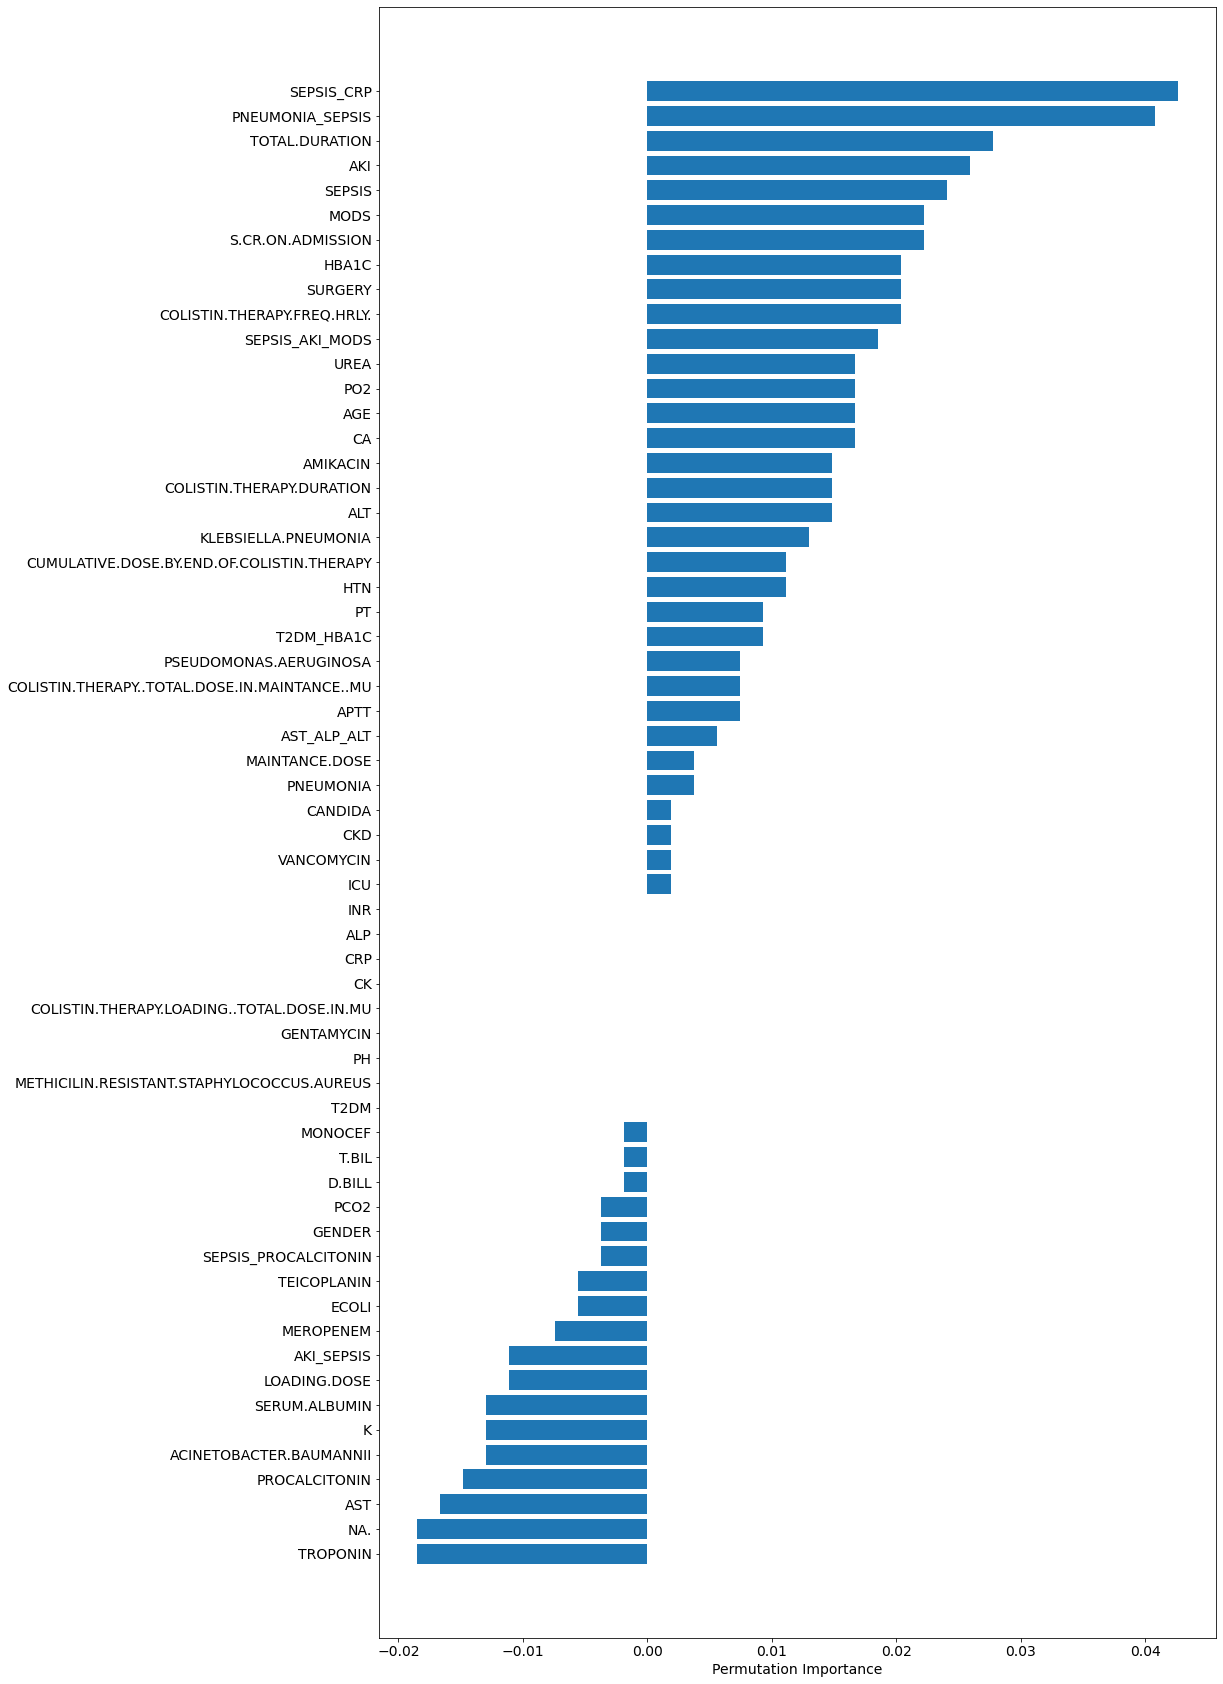

Permutation Importance Method 2: Using eli5


Weight,Feature
0.0370 ± 0.0234,S.CR.ON.ADMISSION
0.0333 ± 0.0637,COLISTIN.THERAPY..TOTAL.DOSE.IN.MAINTANCE..MU
0.0333 ± 0.0857,PNEUMONIA_SEPSIS
0.0296 ± 0.0296,SEPSIS_CRP
0.0259 ± 0.0181,AMIKACIN
0.0259 ± 0.0181,KLEBSIELLA.PNEUMONIA
0.0259 ± 0.0296,UREA
0.0222 ± 0.0432,CUMULATIVE.DOSE.BY.END.OF.COLISTIN.THERAPY
0.0222 ± 0.0432,COLISTIN.THERAPY.FREQ.HRLY.
0.0222 ± 0.0432,TOTAL.DURATION


Permutation Importance Method 3: Using Custom Function


Permutation Importance for Model SVMpoly
Permutation Importance Method 1: Using scikit


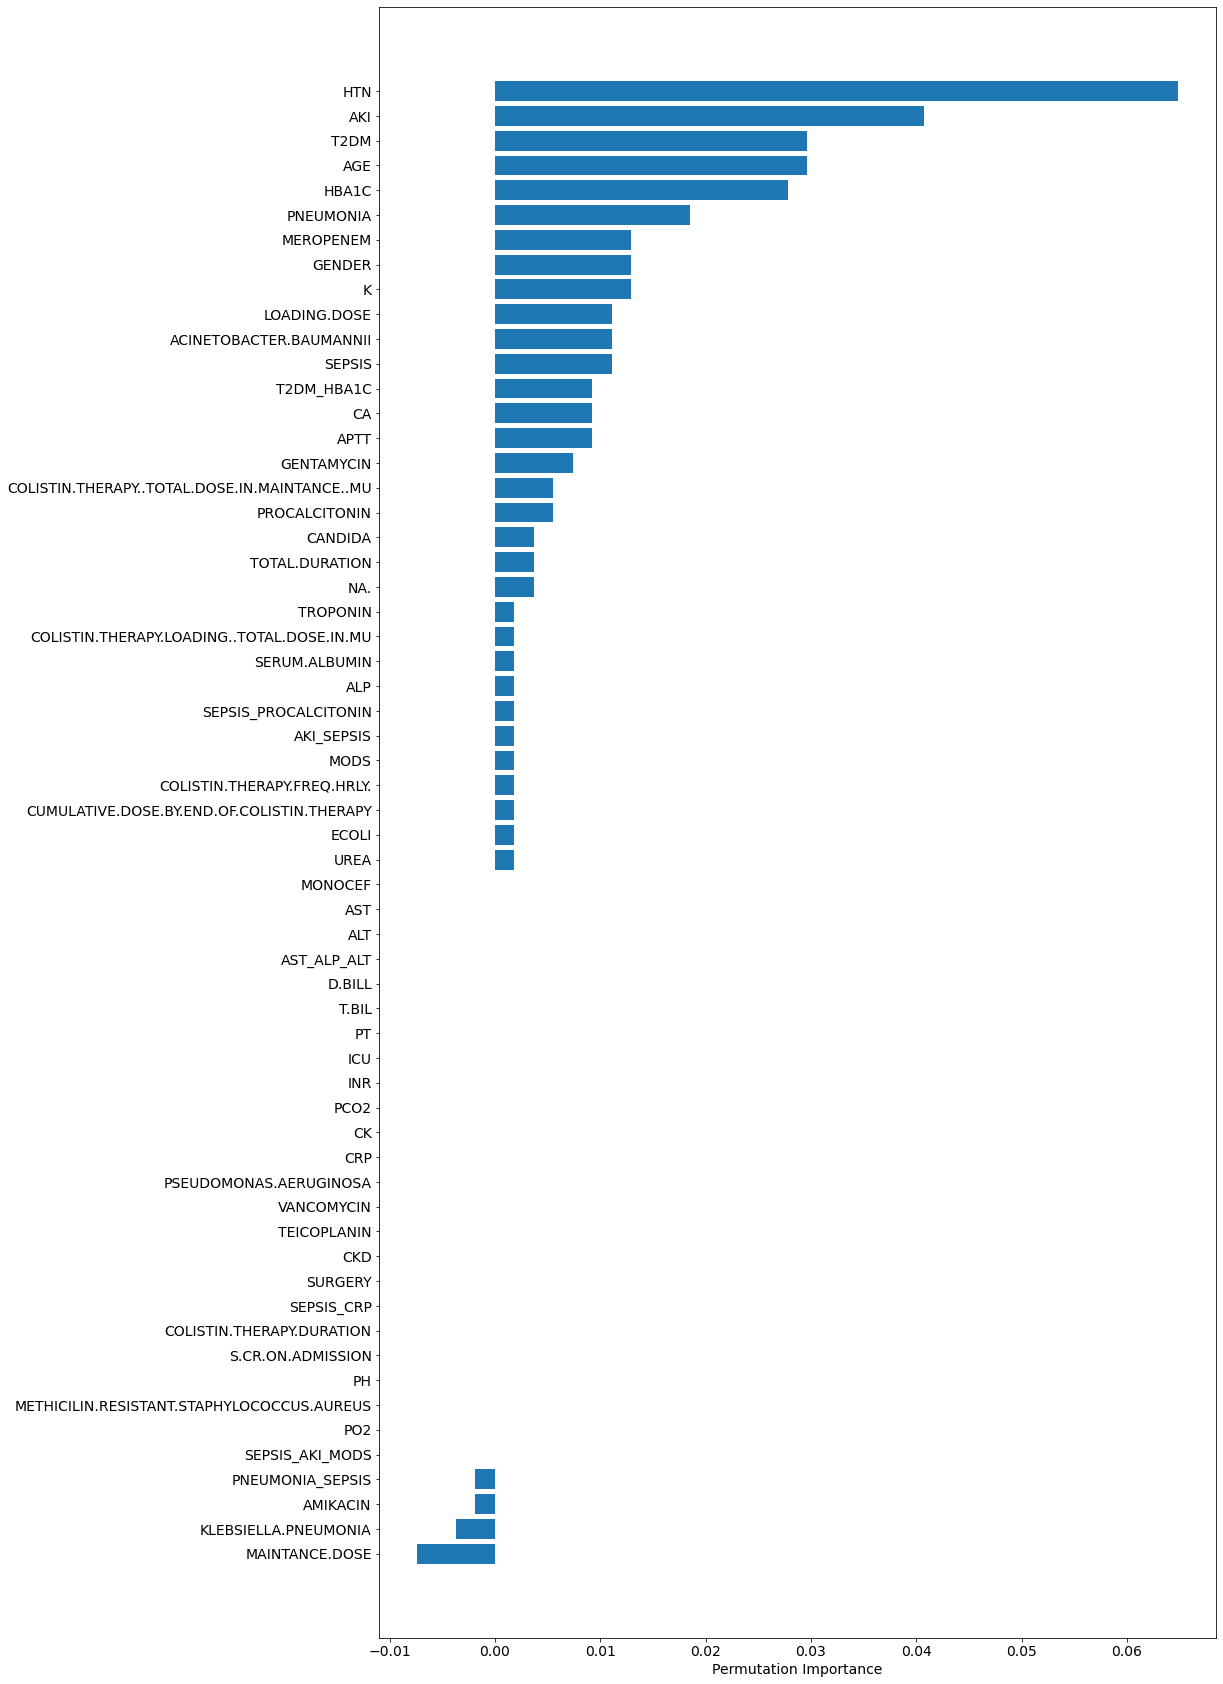

Permutation Importance Method 2: Using eli5


Weight,Feature
0.0667 ± 0.0502,HTN
0.0296 ± 0.0378,AKI
0.0259 ± 0.0296,AGE
0.0222 ± 0.0277,T2DM
0.0222 ± 0.0432,PNEUMONIA
0.0185 ± 0.0000,LOADING.DOSE
0.0185 ± 0.0234,HBA1C
0.0185 ± 0.0234,COLISTIN.THERAPY..TOTAL.DOSE.IN.MAINTANCE..MU
0.0148 ± 0.0148,ACINETOBACTER.BAUMANNII
0.0111 ± 0.0296,K


Permutation Importance Method 3: Using Custom Function


Permutation Importance for Model SVMrbf
Permutation Importance Method 1: Using scikit


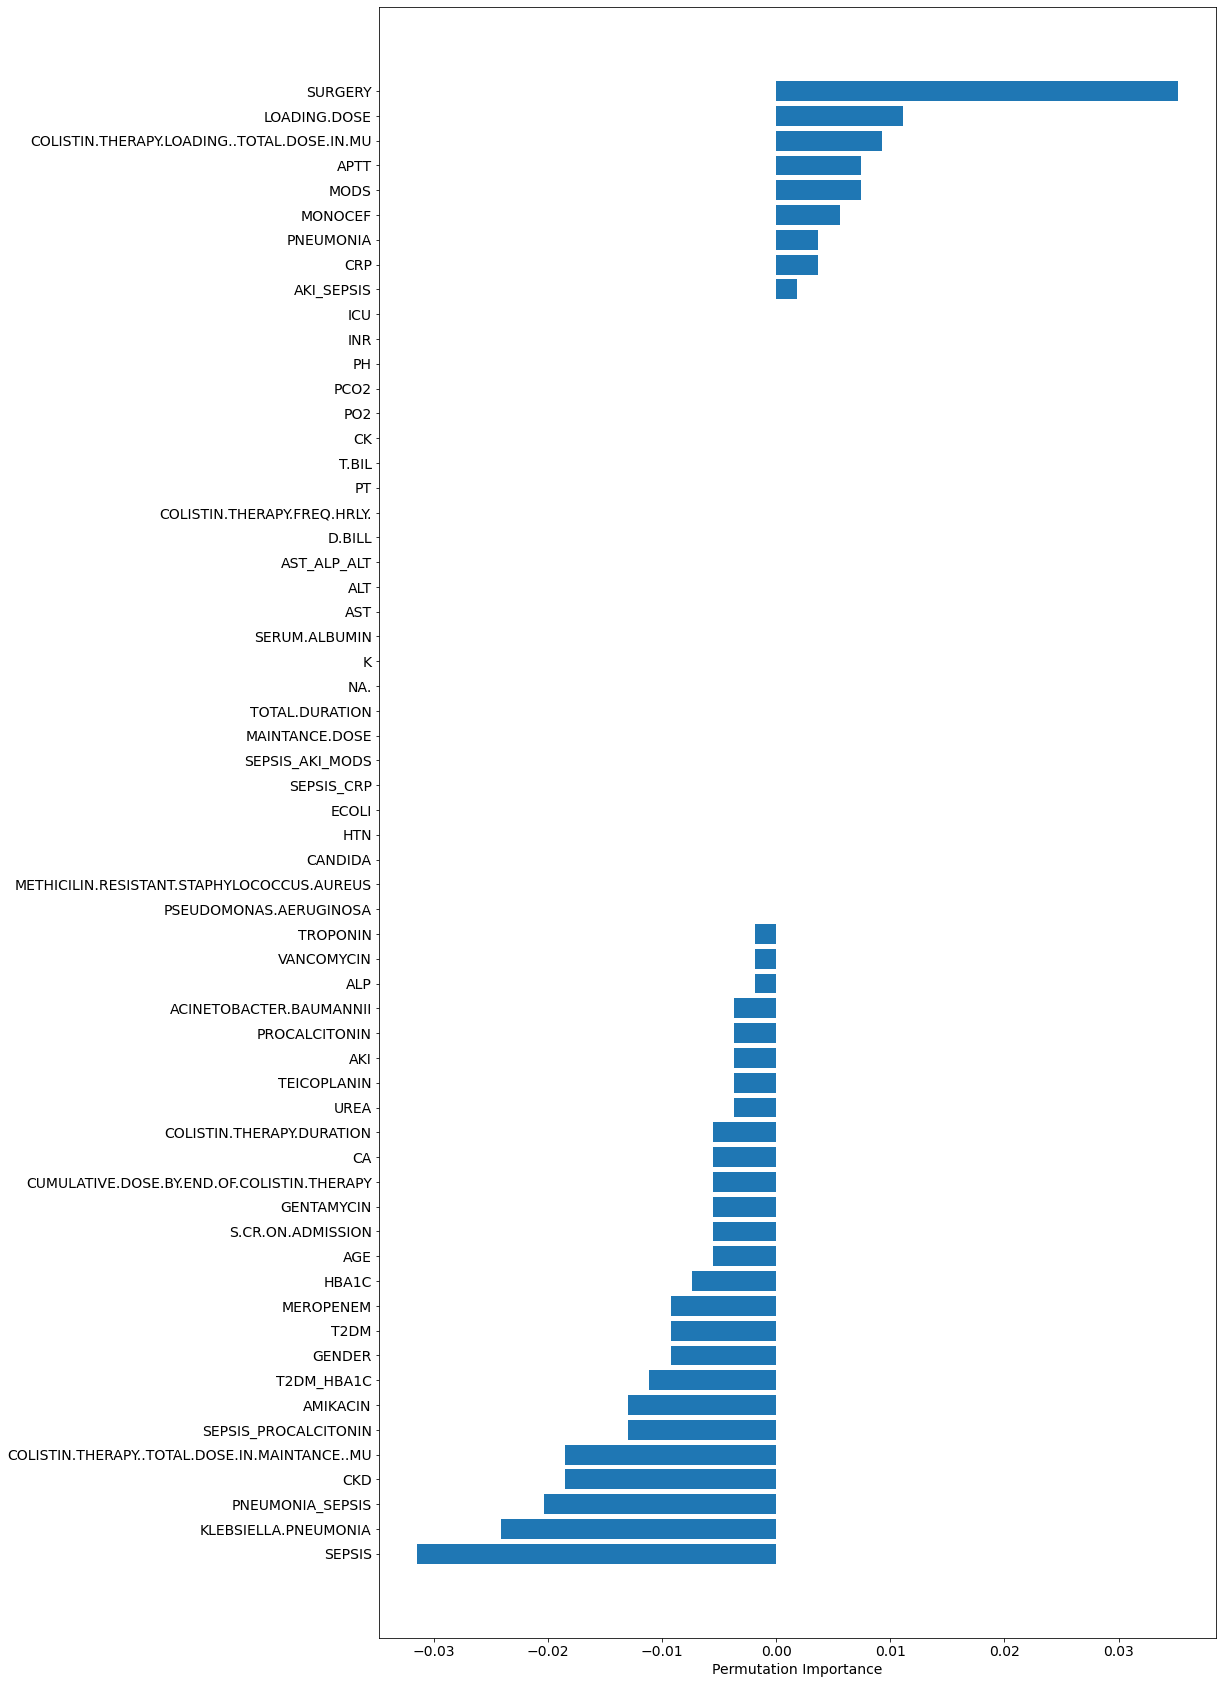

Permutation Importance Method 2: Using eli5


Weight,Feature
0.0185 ± 0.0620,SURGERY
0.0111 ± 0.0502,PROCALCITONIN
0.0074 ± 0.0181,APTT
0.0037 ± 0.0277,GENDER
0.0037 ± 0.0148,SEPSIS_CRP
0.0037 ± 0.0148,COLISTIN.THERAPY.LOADING..TOTAL.DOSE.IN.MU
0.0037 ± 0.0148,ALP
0.0000 ± 0.0234,AKI_SEPSIS
0 ± 0.0000,PH
0 ± 0.0000,PCO2


Permutation Importance Method 3: Using Custom Function


Permutation Importance for Model RF
Permutation Importance Method 1: Using scikit


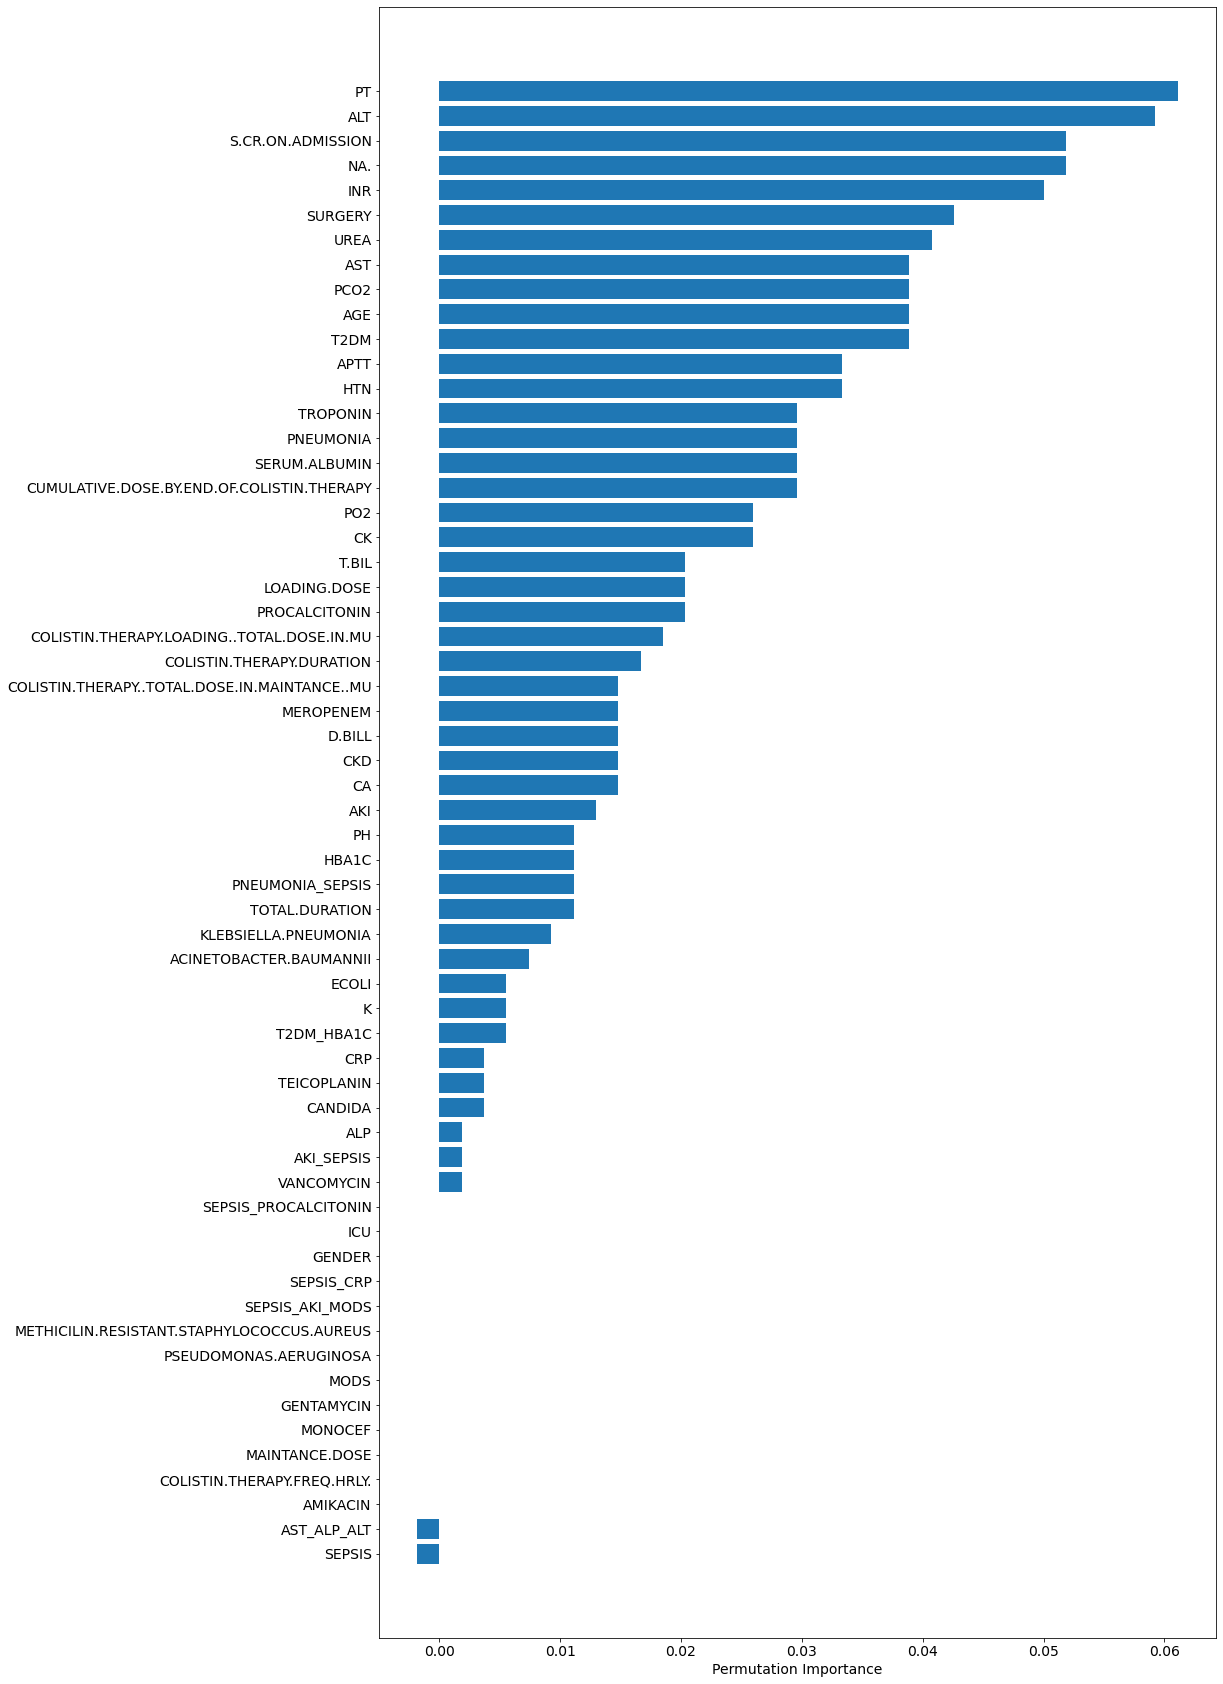

Permutation Importance Method 2: Using eli5


Weight,Feature
0.0630 ± 0.0181,NA.
0.0593 ± 0.0544,INR
0.0593 ± 0.0277,S.CR.ON.ADMISSION
0.0593 ± 0.0363,PT
0.0556 ± 0.0406,ALT
0.0519 ± 0.0432,UREA
0.0481 ± 0.0296,AST
0.0370 ± 0.0331,T2DM
0.0370 ± 0.0331,PCO2
0.0333 ± 0.0148,HTN


Permutation Importance Method 3: Using Custom Function


Permutation Importance for Model NB
Permutation Importance Method 1: Using scikit


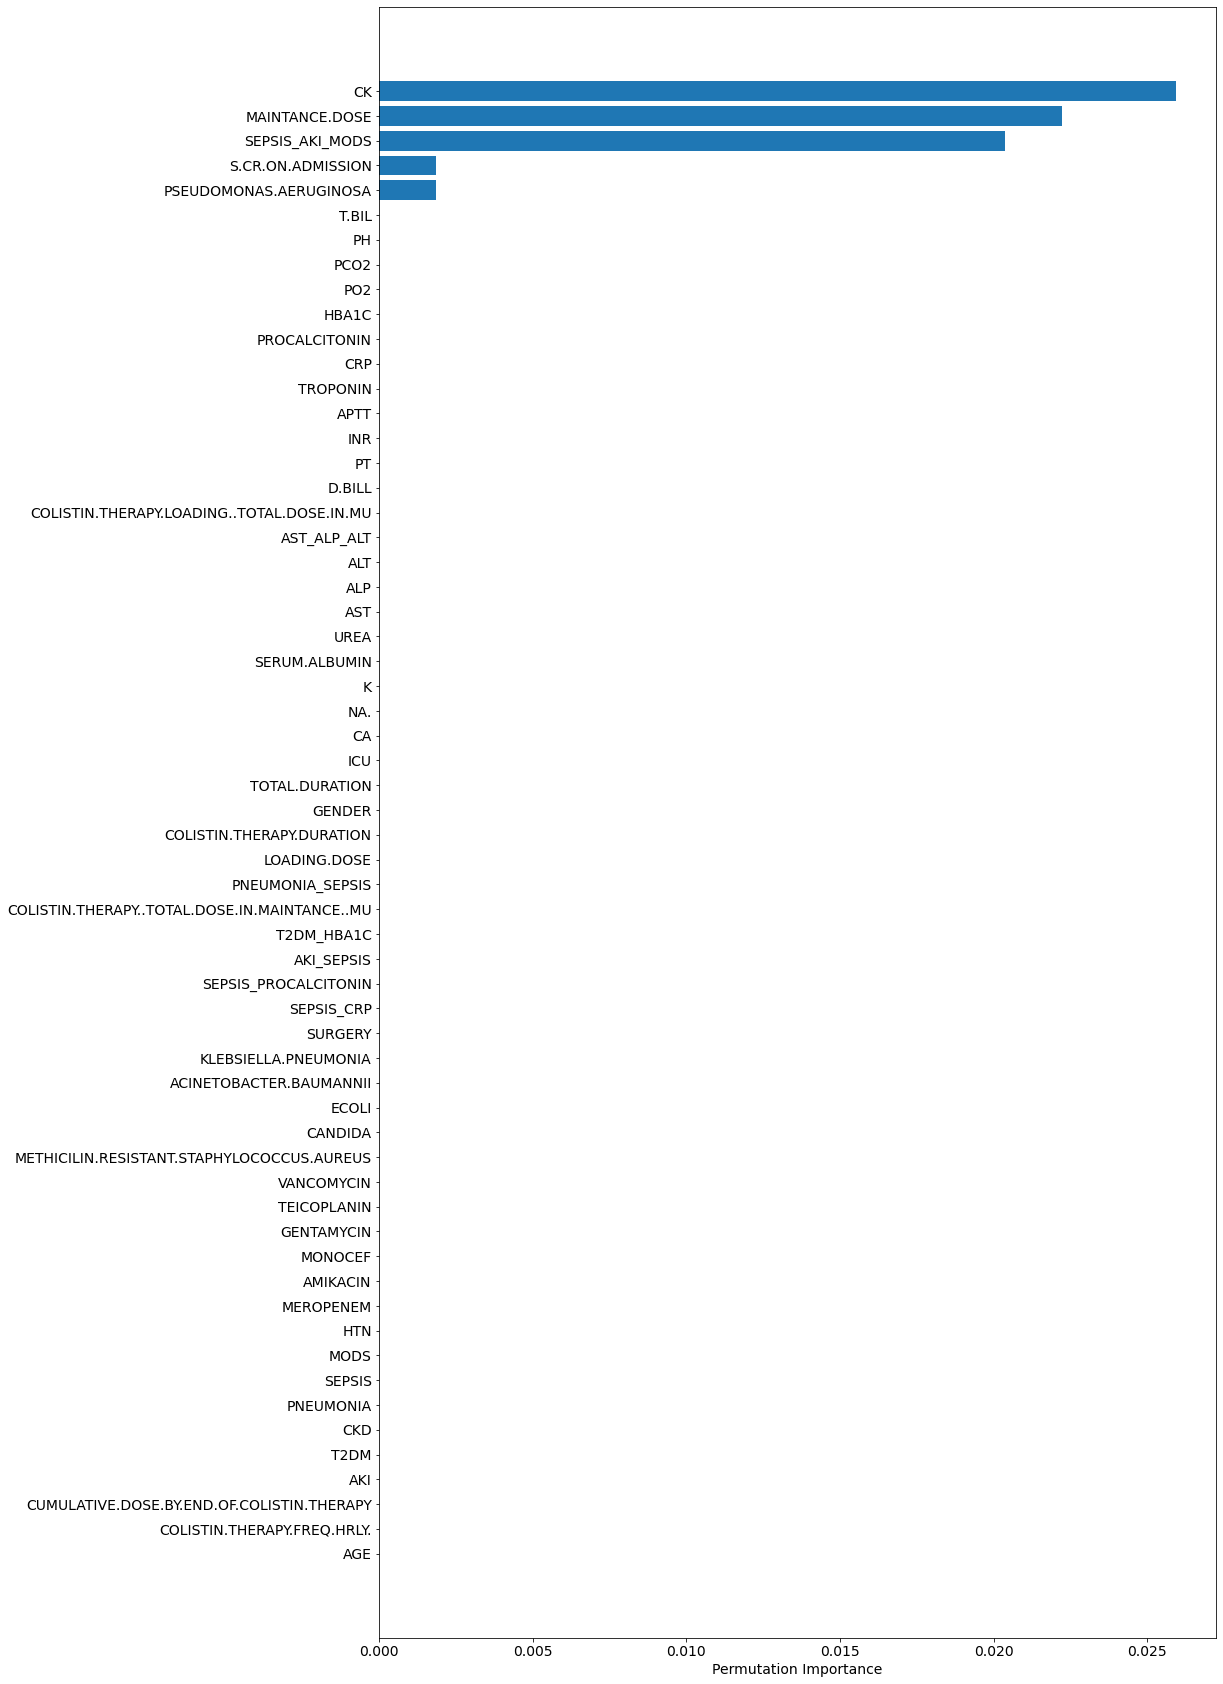

Permutation Importance Method 2: Using eli5


Weight,Feature
0.0333 ± 0.0148,MAINTANCE.DOSE
0.0185 ± 0.0406,CK
0.0148 ± 0.0148,SEPSIS_AKI_MODS
0.0037 ± 0.0148,S.CR.ON.ADMISSION
0.0037 ± 0.0148,D.BILL
0 ± 0.0000,COLISTIN.THERAPY.DURATION
0 ± 0.0000,PH
0 ± 0.0000,PCO2
0 ± 0.0000,PO2
0 ± 0.0000,HBA1C


Permutation Importance Method 3: Using Custom Function


Permutation Importance for Model CART
Permutation Importance Method 1: Using scikit


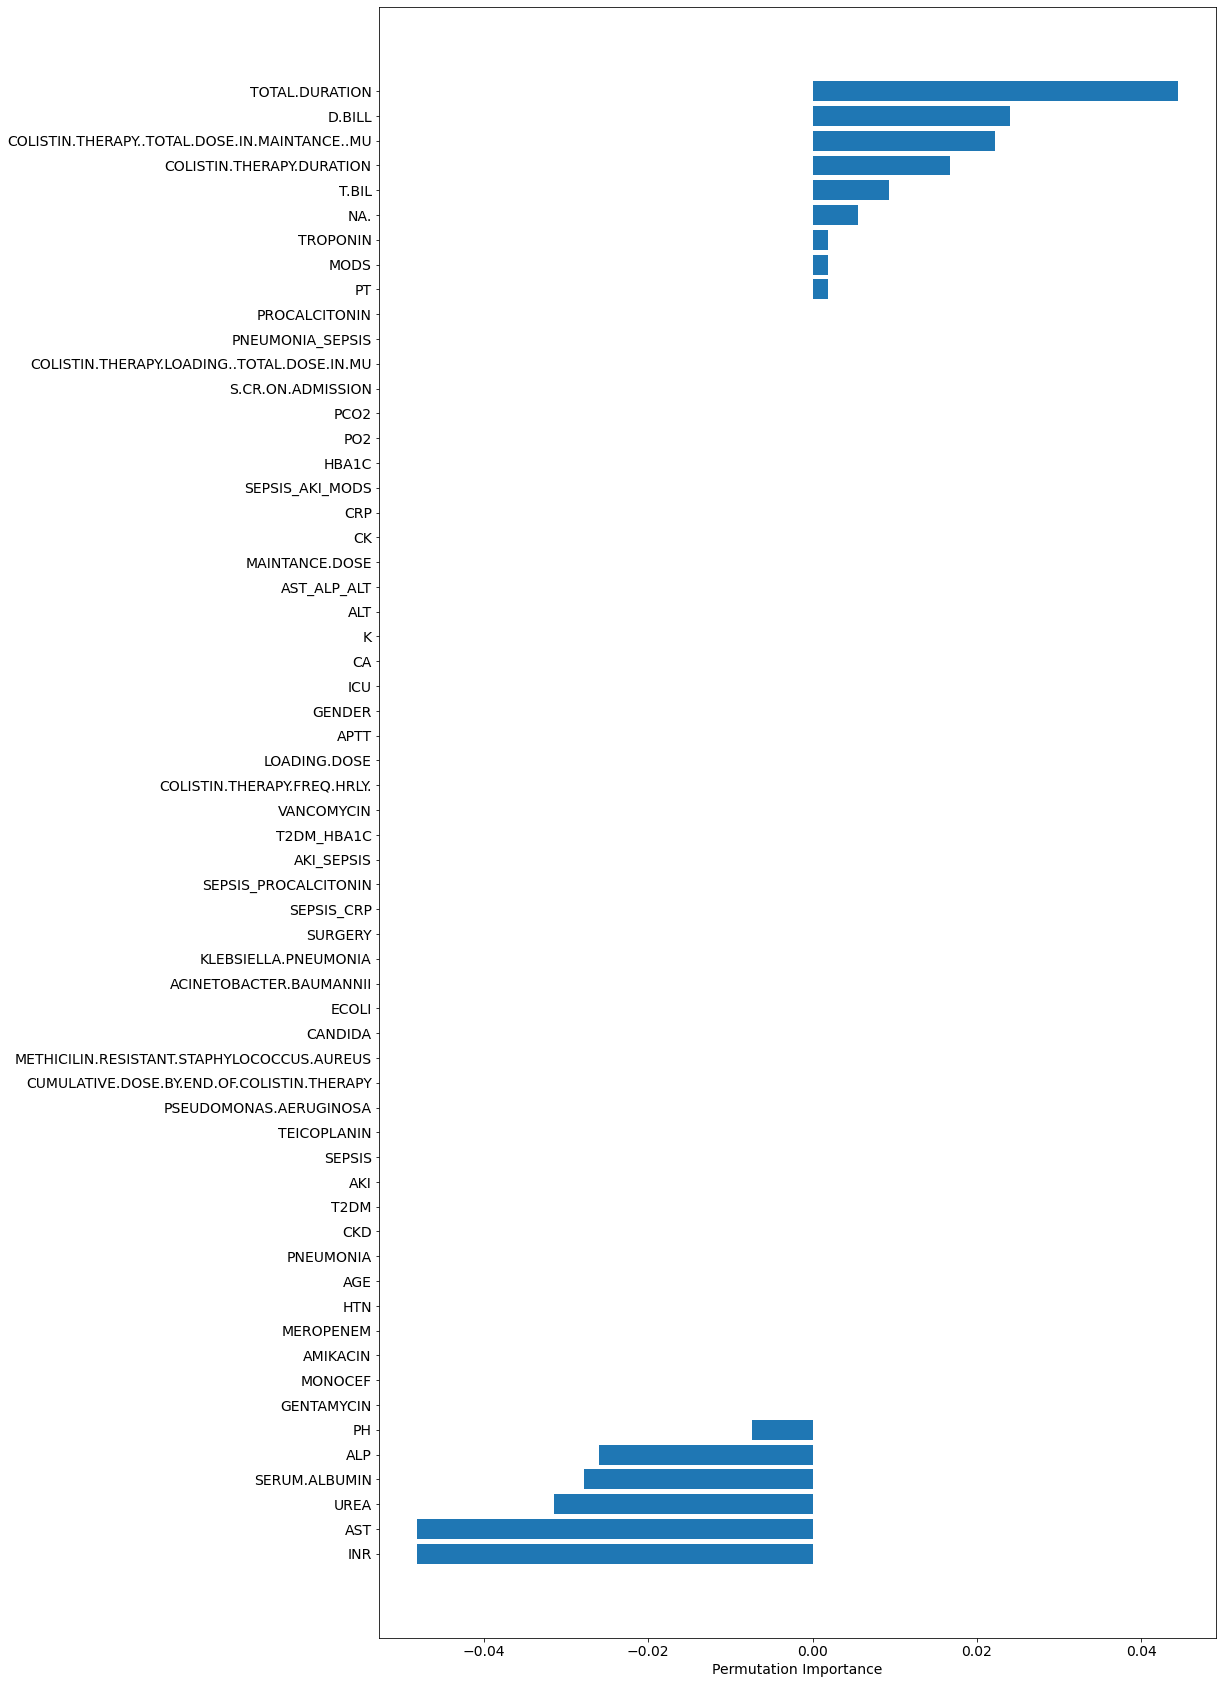

Permutation Importance Method 2: Using eli5


Weight,Feature
0.0741 ± 0.0331,TOTAL.DURATION
0.0259 ± 0.0296,D.BILL
0.0222 ± 0.0277,MODS
0.0222 ± 0.0277,COLISTIN.THERAPY..TOTAL.DOSE.IN.MAINTANCE..MU
0.0148 ± 0.0919,COLISTIN.THERAPY.DURATION
0.0111 ± 0.0444,PT
0.0074 ± 0.0181,TROPONIN
0.0037 ± 0.0277,T.BIL
0.0000 ± 0.0234,PO2
0 ± 0.0000,PCO2


Permutation Importance Method 3: Using Custom Function


Permutation Importance for Model XGBoost
Permutation Importance Method 1: Using scikit


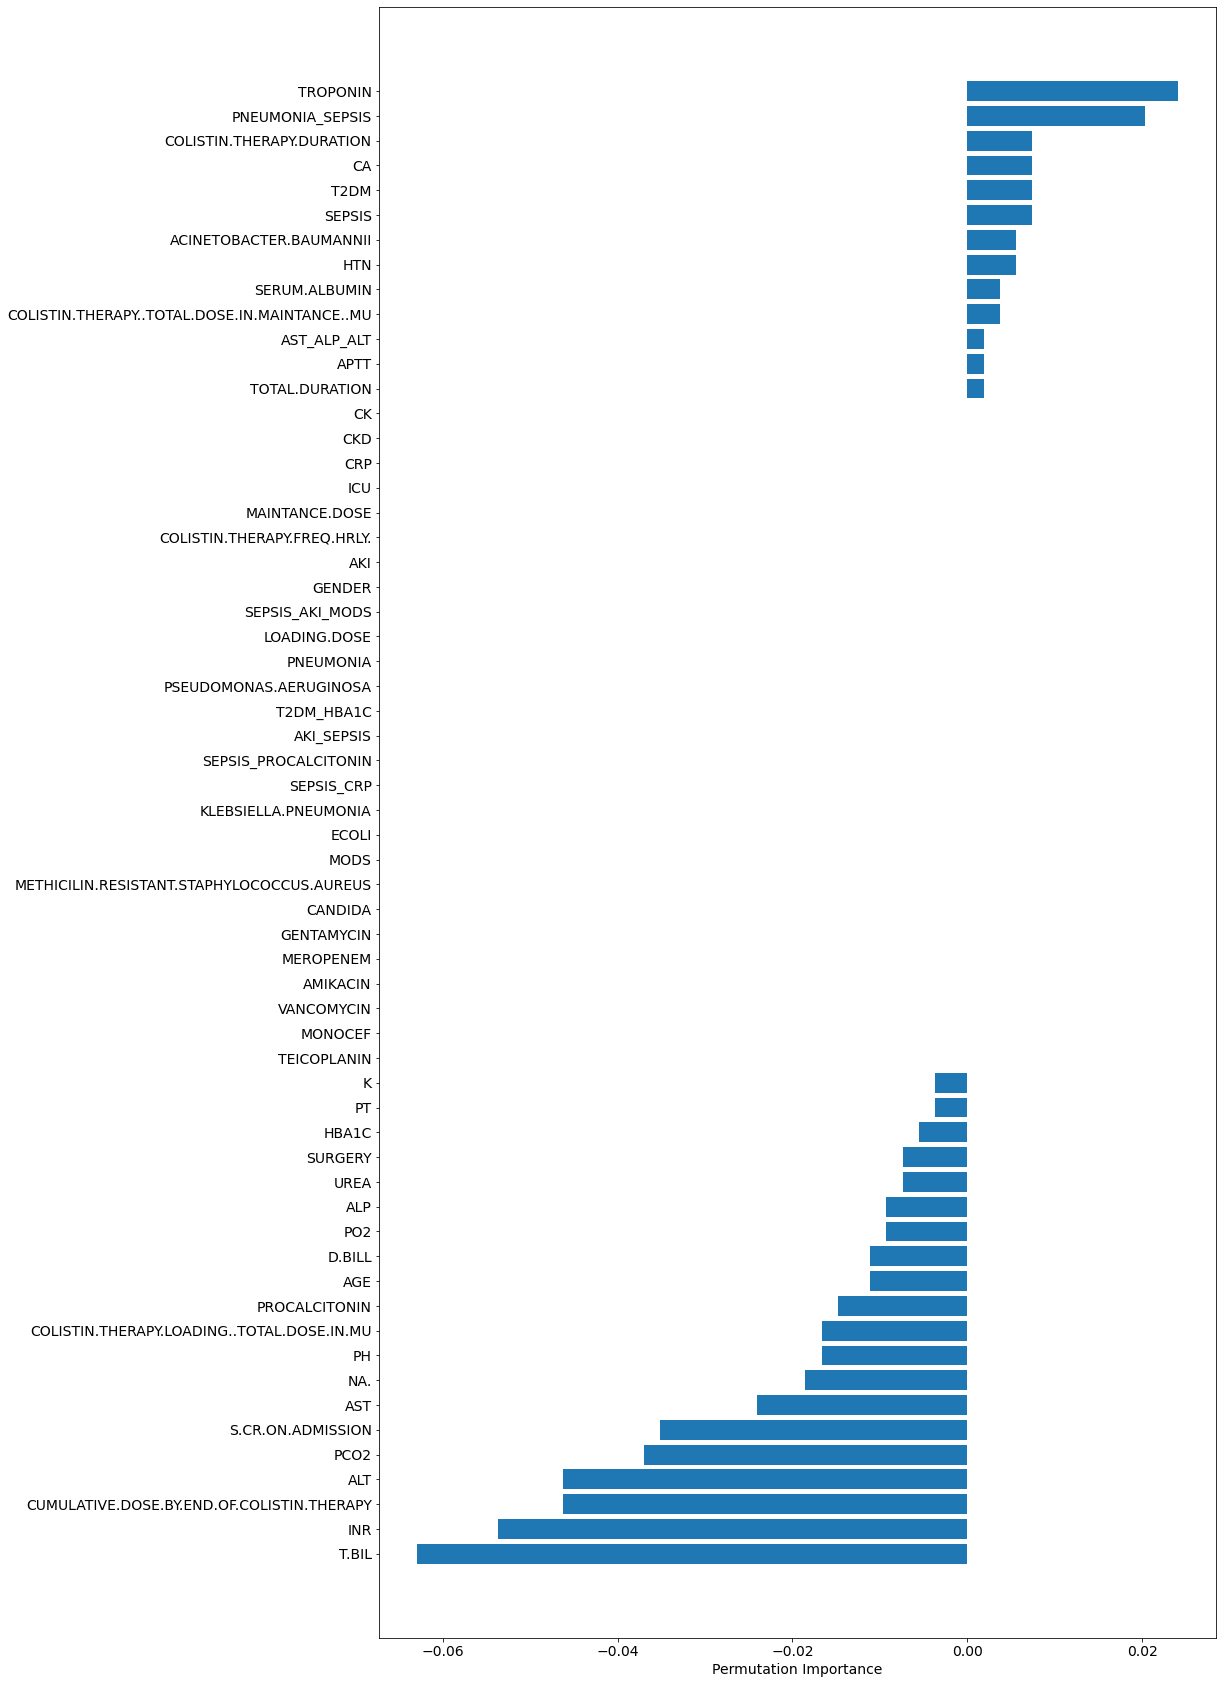

Permutation Importance Method 2: Using eli5


Weight,Feature
0.0296 ± 0.0181,TROPONIN
0.0111 ± 0.0378,ACINETOBACTER.BAUMANNII
0.0111 ± 0.0181,T2DM
0.0111 ± 0.0181,SEPSIS
0.0111 ± 0.0181,CA
0.0111 ± 0.0181,HTN
0.0074 ± 0.0181,TOTAL.DURATION
0.0037 ± 0.0363,PO2
0.0037 ± 0.0148,SERUM.ALBUMIN
0.0037 ± 0.0277,APTT


Permutation Importance Method 3: Using Custom Function


In [ ]:
for model_name in trained_models.keys():

    print('Permutation Importance for Model', model_name)
    model = trained_models[model_name]

    print("Permutation Importance Method 1: Using scikit")
    get_permutation_feature_imp_scikit(model)

    print("Permutation Importance Method 2: Using eli5")
    get_permutation_feature_imp_eli5(model)

    print("Permutation Importance Method 3: Using Custom Function")
    get_permutation_feature_imp_custom(model)

2. FEATURE IMPORTANCE USING SHAP (A game theoretic approach using Shapley values to explain the output of any machine learning model)

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 28.5 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=b34b59cbccd17dbd726b8a78b1b0f2fd41184e98b1f18da7719188c6b00ae5e5
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

Permutation Importance for Model SVMlinear


  0%|          | 0/54 [00:00<?, ?it/s]

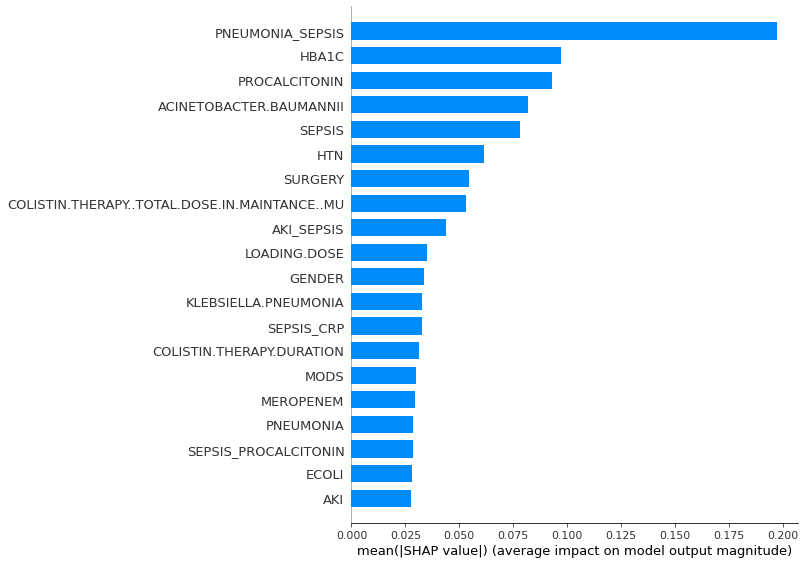

Permutation Importance for Model SVMpoly


  0%|          | 0/54 [00:00<?, ?it/s]

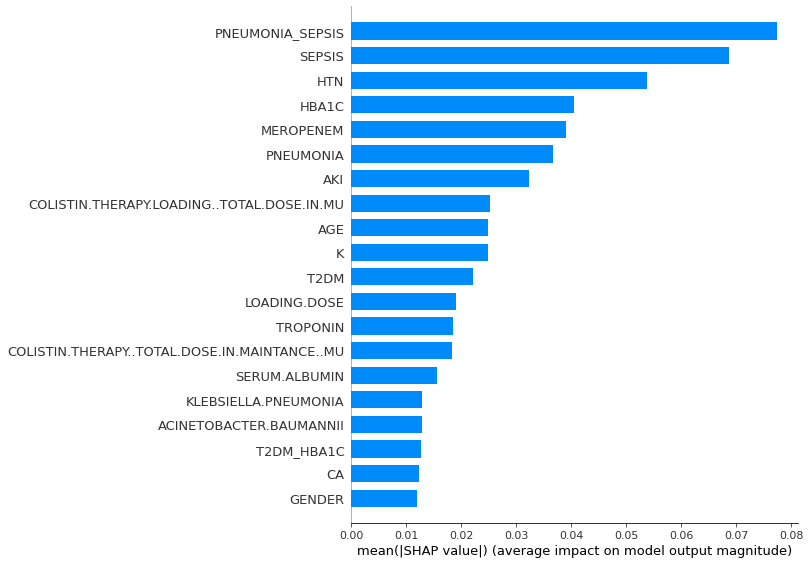

Permutation Importance for Model SVMrbf


  0%|          | 0/54 [00:00<?, ?it/s]

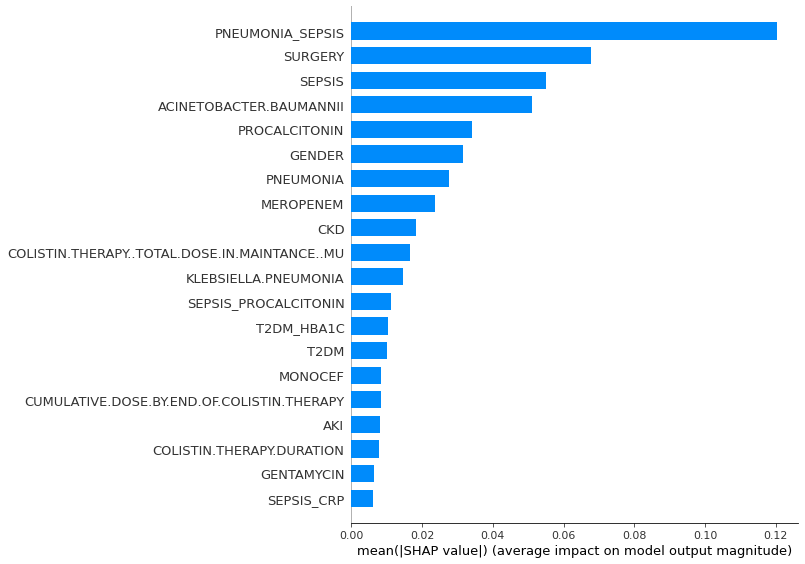

Permutation Importance for Model RF


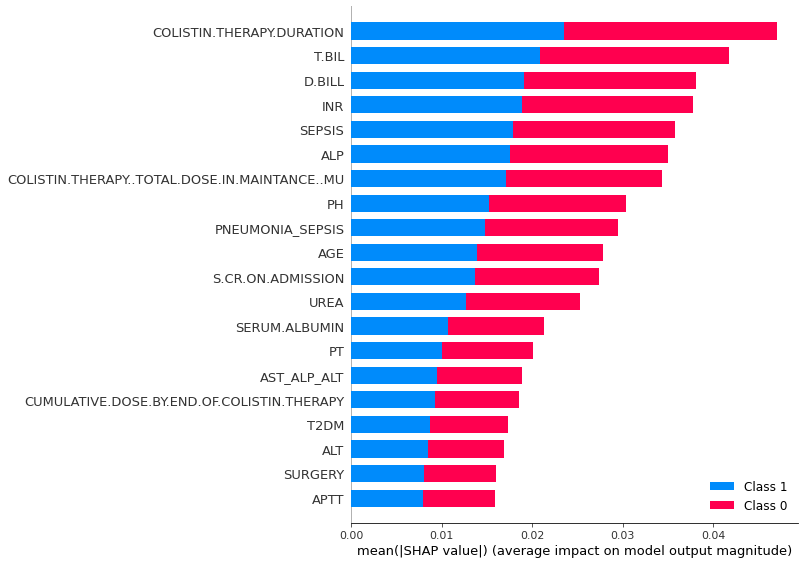

Permutation Importance for Model NB


  0%|          | 0/54 [00:00<?, ?it/s]

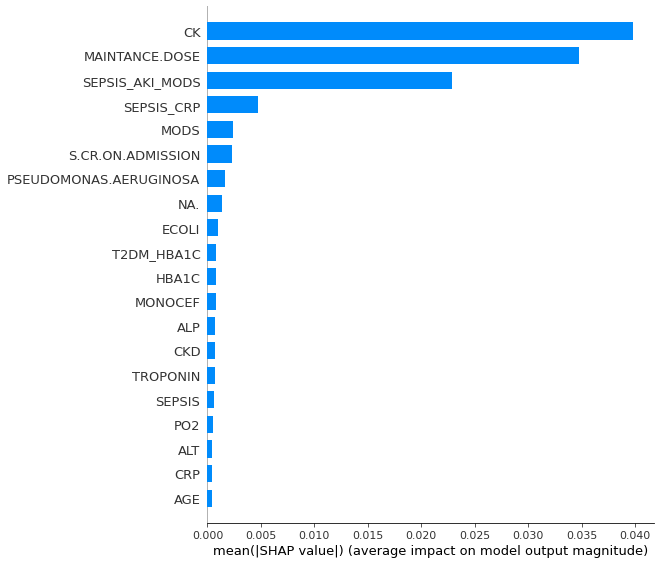

Permutation Importance for Model CART


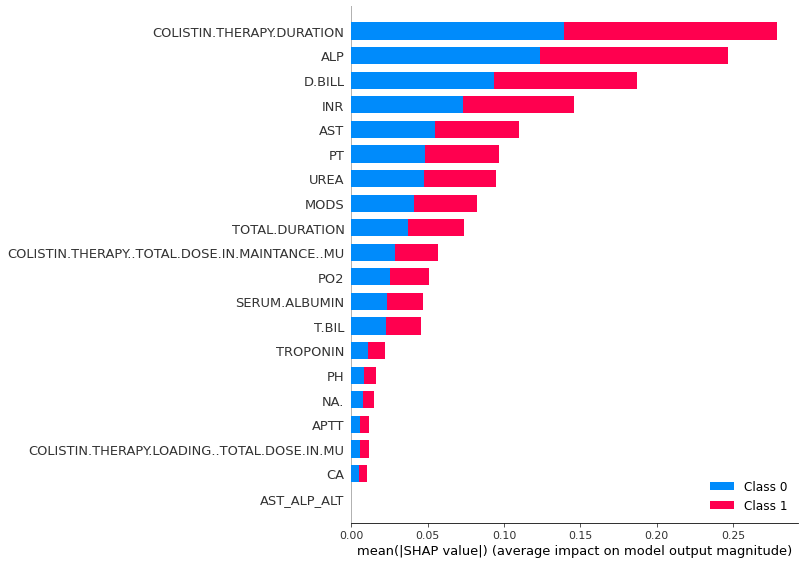

Permutation Importance for Model XGBoost


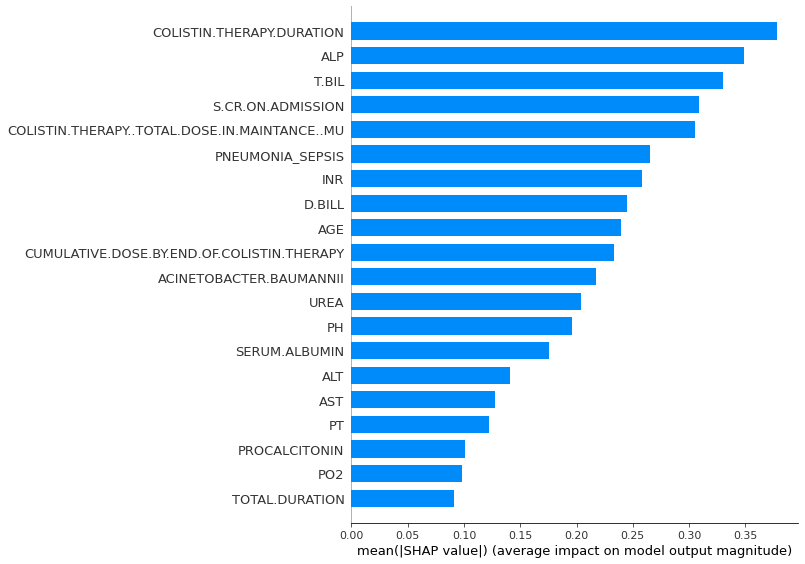

In [ ]:
for model_name in trained_models.keys():
    print('Permutation Importance for Model', model_name)
    model = trained_models[model_name]
    if (model_name == 'RF' or model_name == 'XGBoost' or model_name == 'CART'):
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    else:
        explainer = shap.KernelExplainer(model.predict, X_test)
        shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_type="bar")


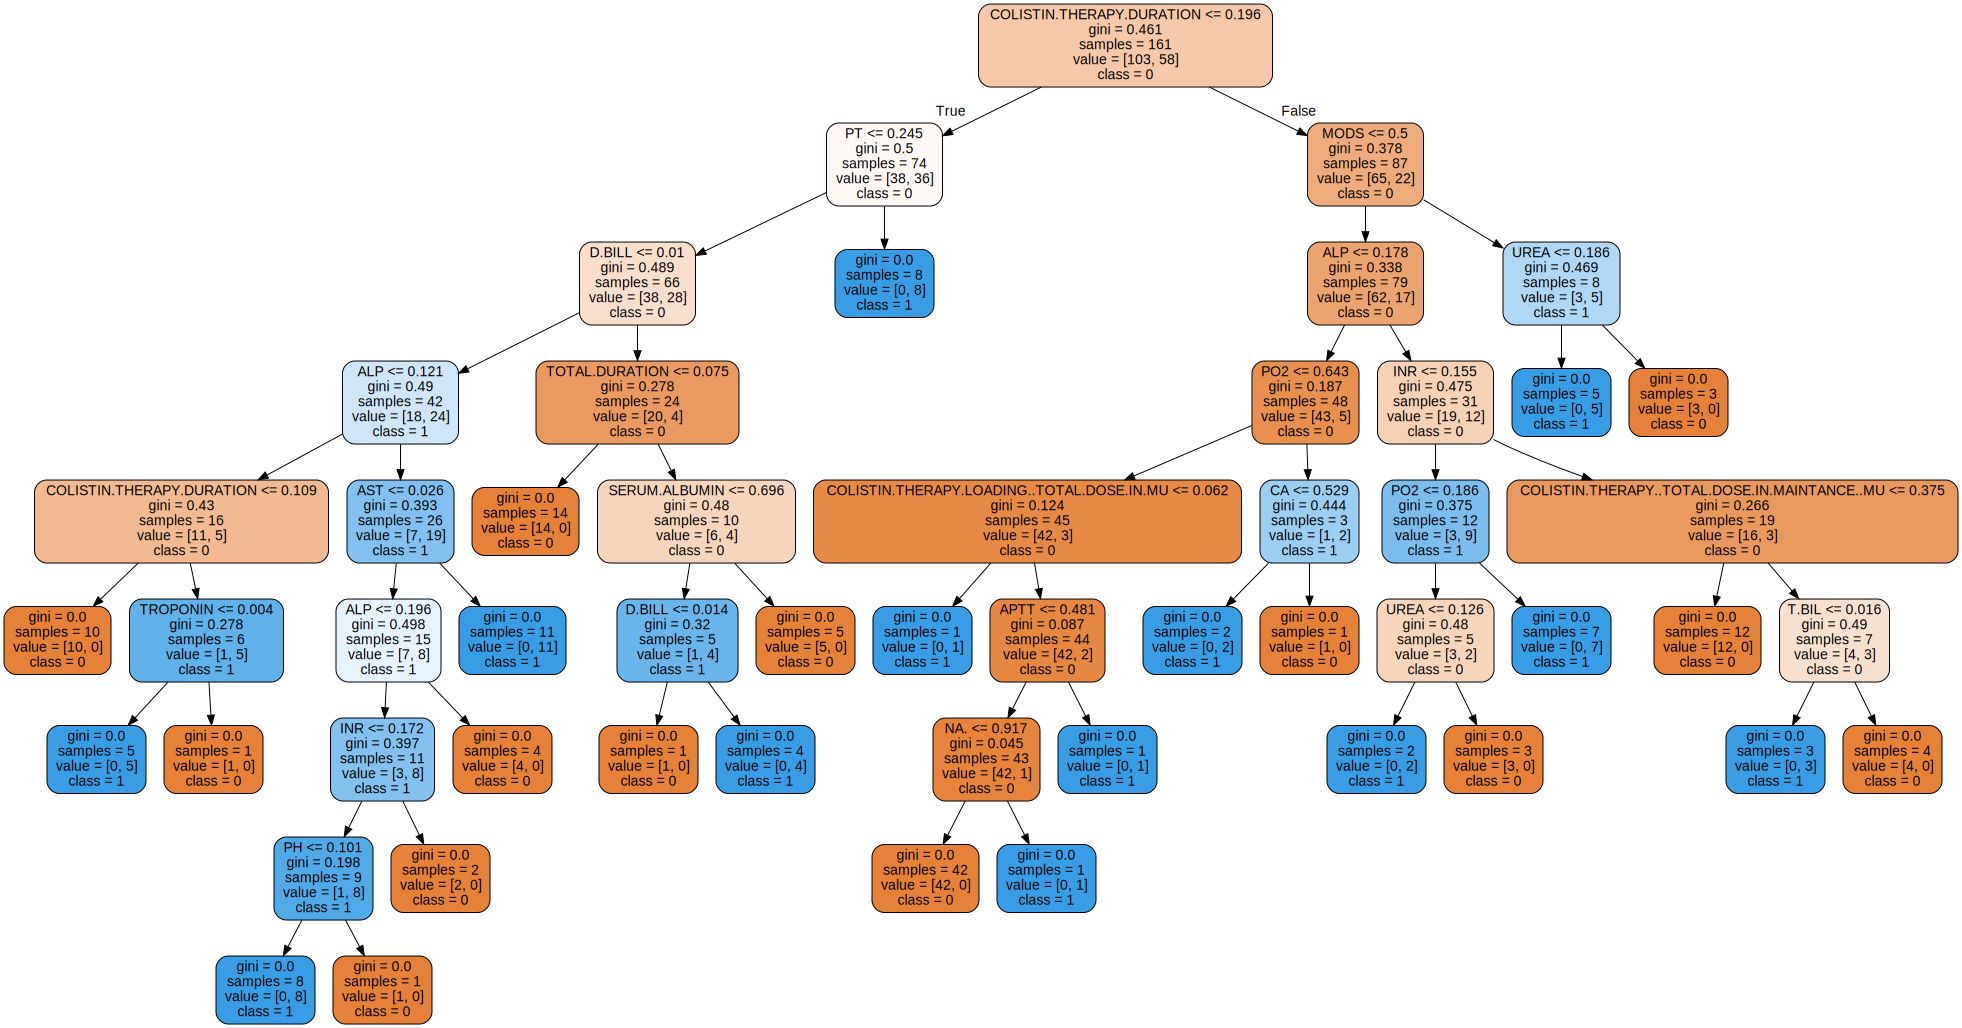

In [ ]:
graphs["CART"]

## ----------------------------------EXTRAS-----------------------------------------

# Gradient Boosting Classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate,random_state=0) #max_features=10, max_depth=2 not used
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))

Learning rate:  0.05
Accuracy score (training): 0.845
Accuracy score (validation): 0.648
Learning rate:  0.075
Accuracy score (training): 0.919
Accuracy score (validation): 0.611
Learning rate:  0.1
Accuracy score (training): 0.944
Accuracy score (validation): 0.593
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.593
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.611
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.667
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.648


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=0) #max_features=, max_depth=3,
gb_clf2.fit(X_train, Y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))

Confusion Matrix:
[[27  7]
 [15  5]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.79      0.71        34
           1       0.42      0.25      0.31        20

    accuracy                           0.59        54
   macro avg       0.53      0.52      0.51        54
weighted avg       0.56      0.59      0.56        54



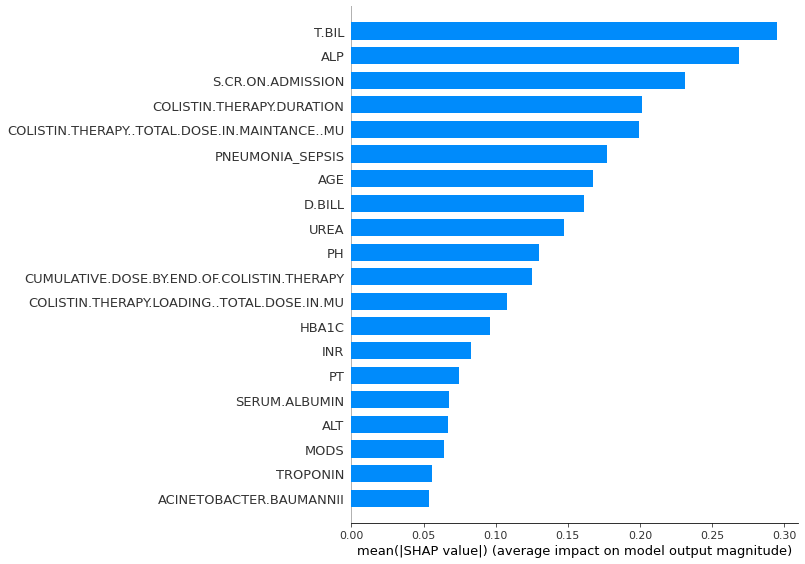

In [ ]:
  explainer = shap.TreeExplainer(gb_clf2)
  shap_values = explainer.shap_values(X_test)
  shap.summary_plot(shap_values, X_test, plot_type="bar")

# XGBoost's built in feature importance methods

XGBoost inbuilt feature importance https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27

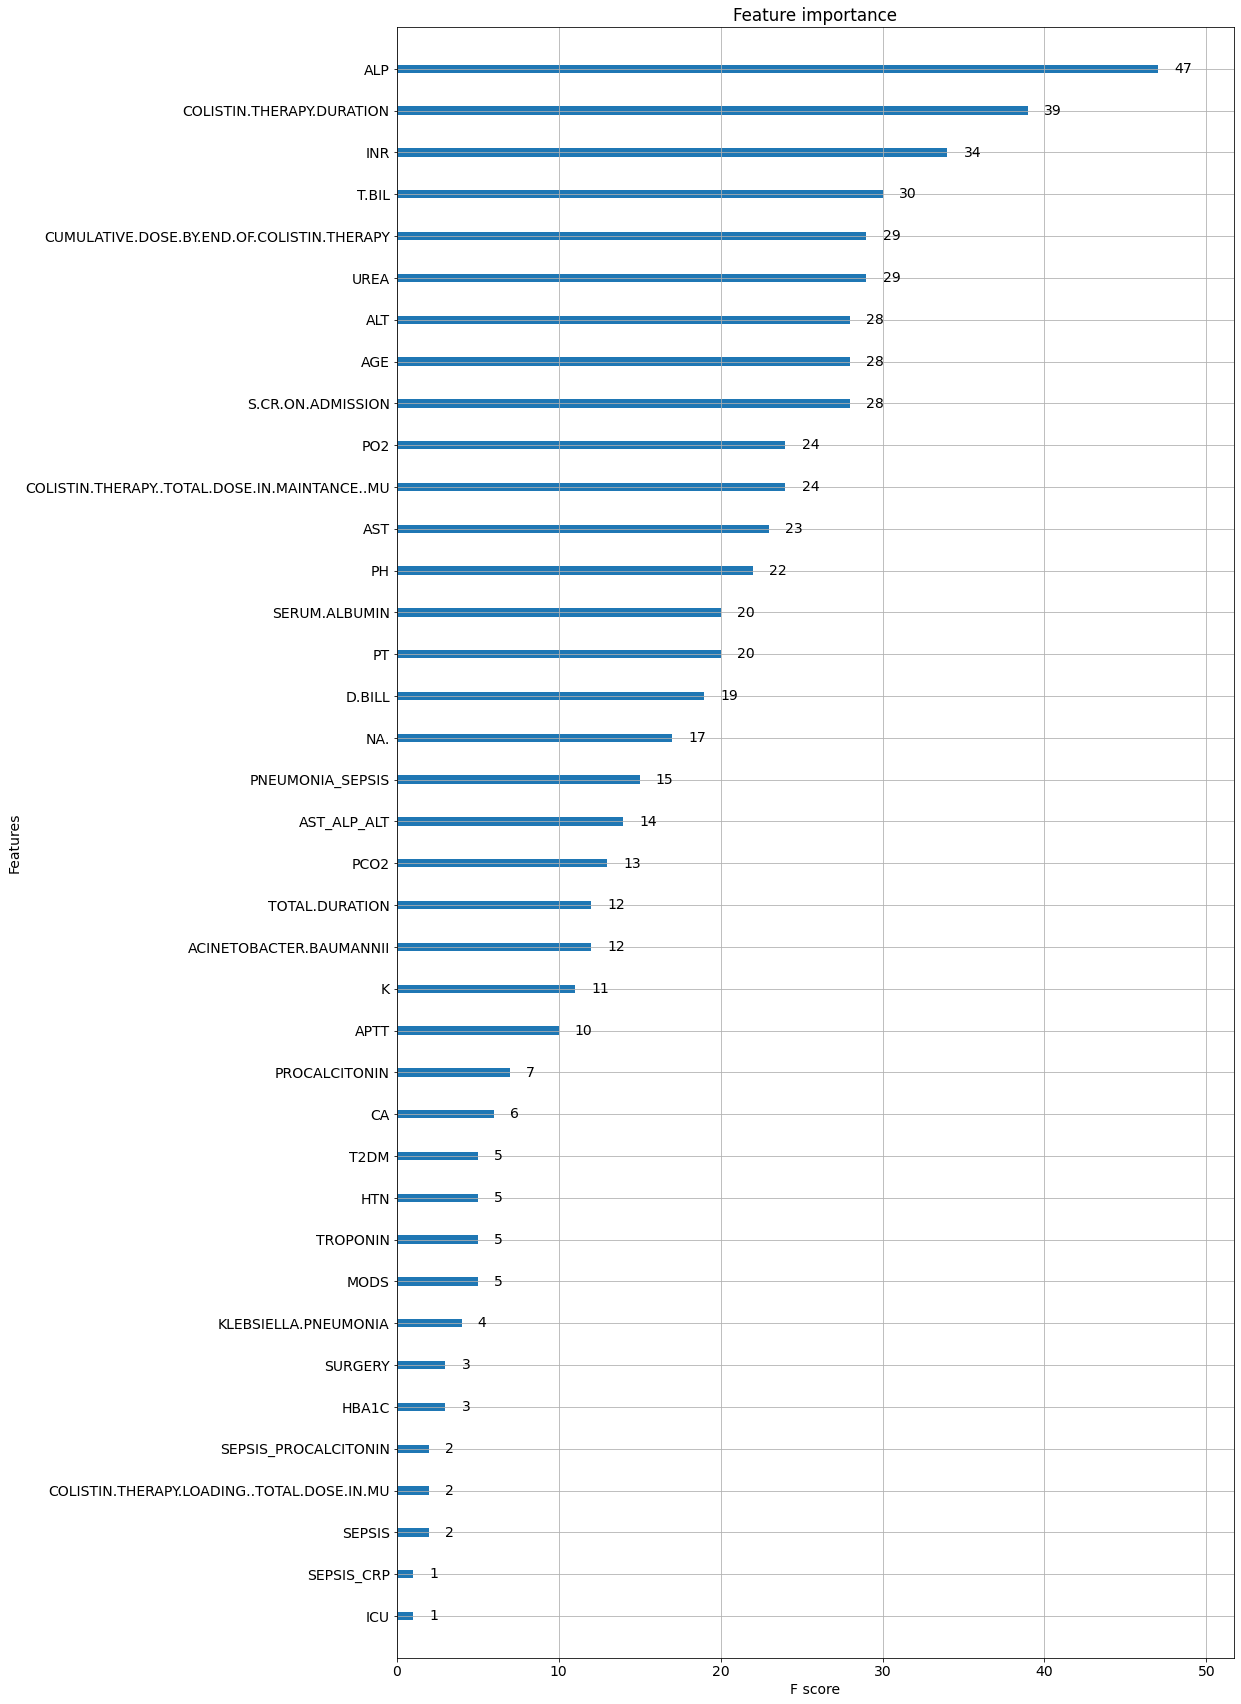

In [ ]:
xgboost.plot_importance(trained_models['XGBoost'])


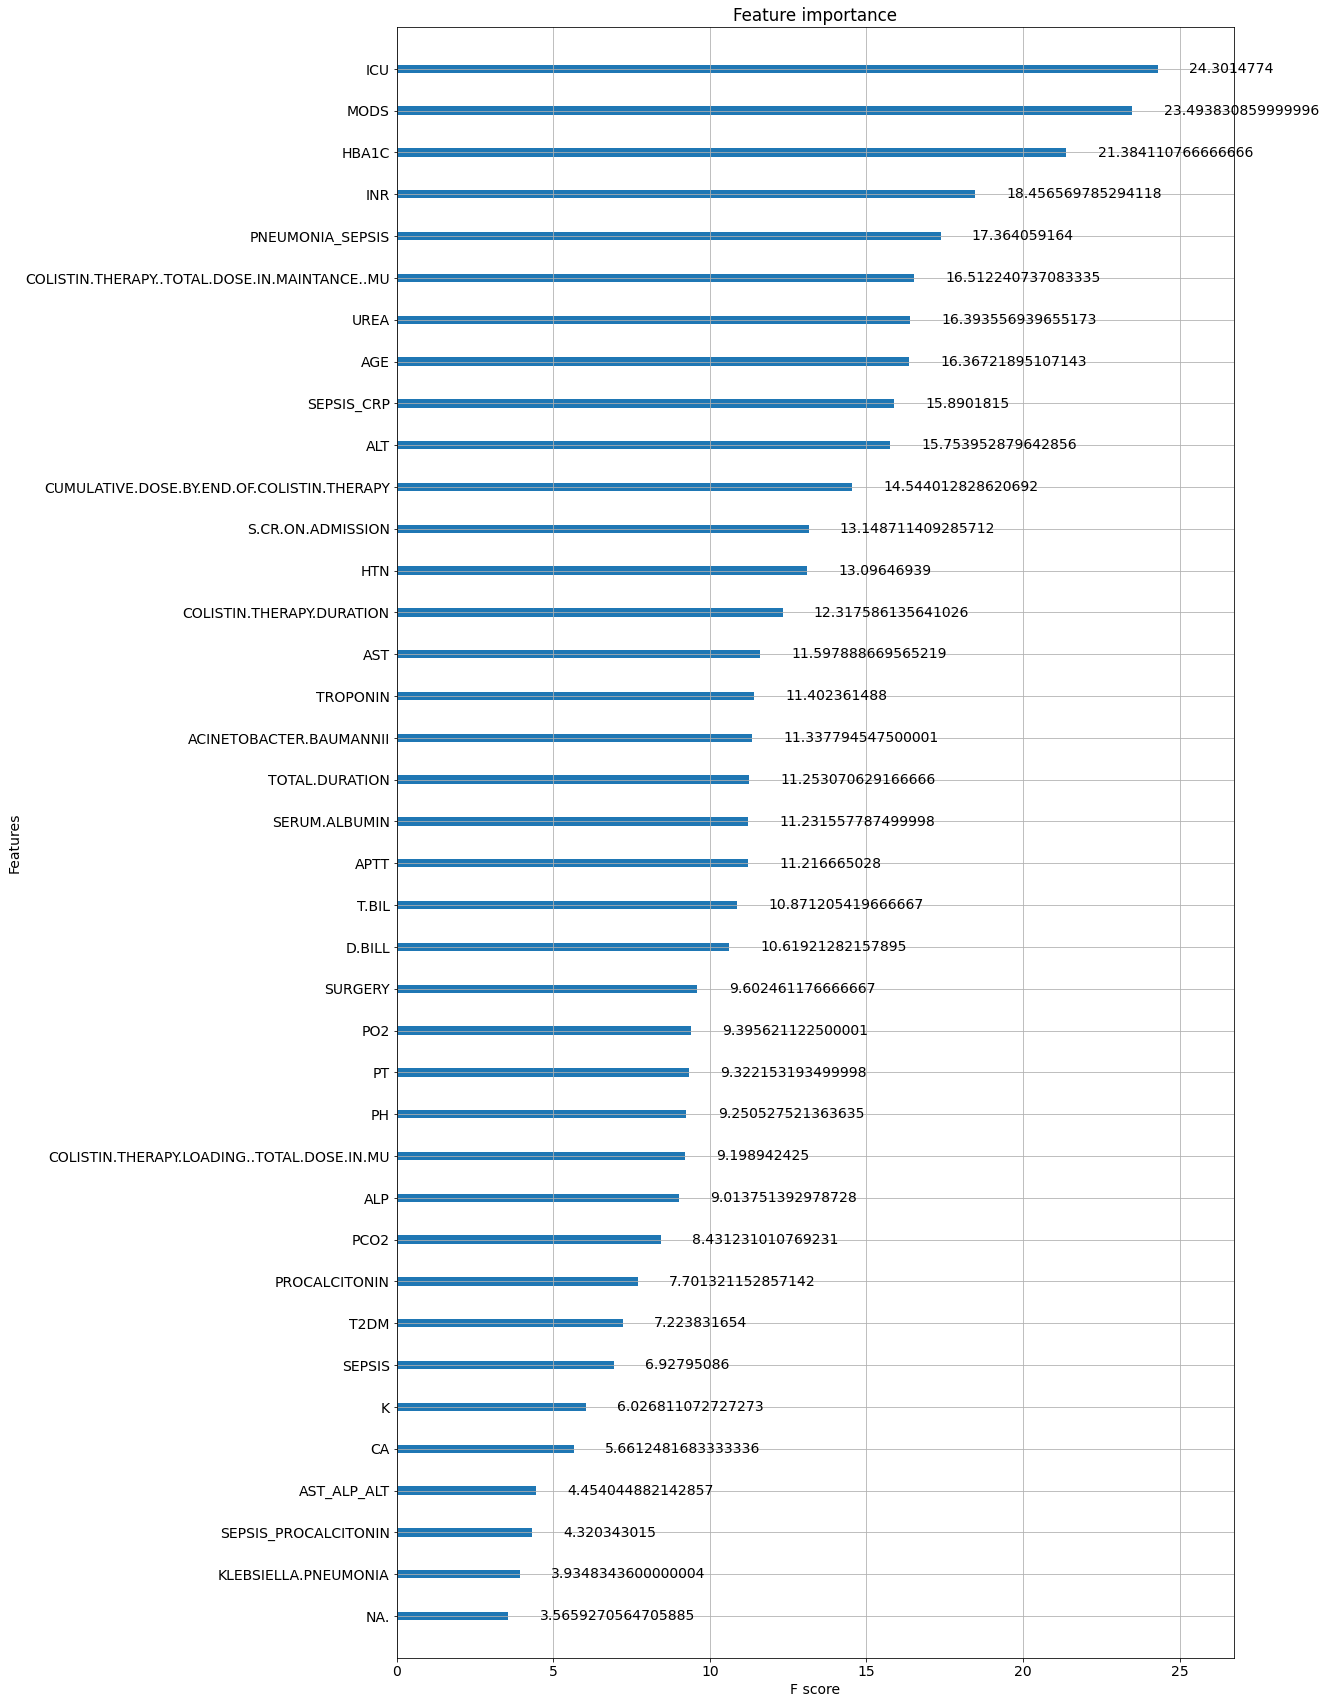

In [ ]:
xgboost.plot_importance(trained_models['XGBoost'], importance_type="cover")

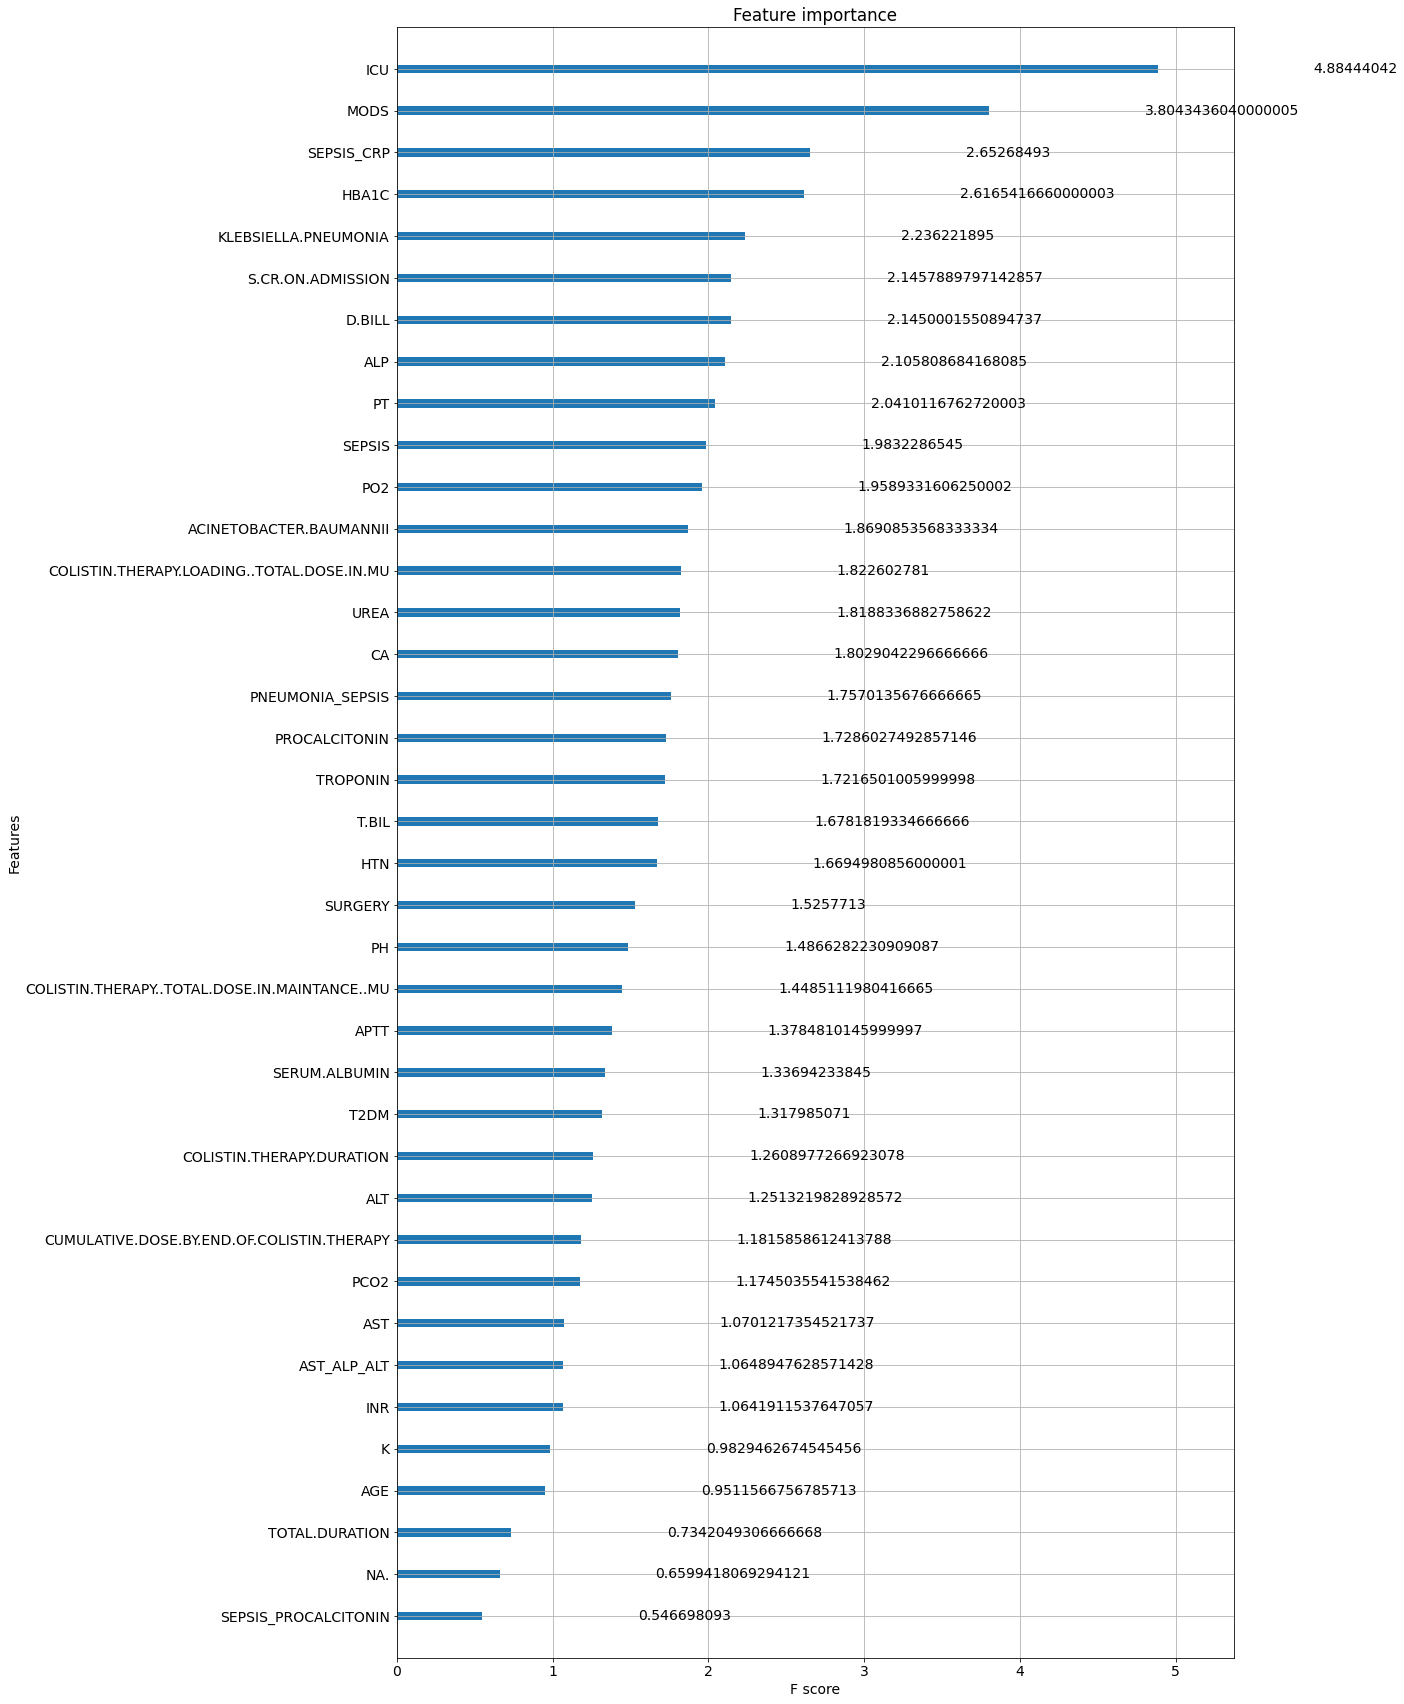

In [ ]:
xgboost.plot_importance(trained_models['XGBoost'], importance_type="gain")